#BA810 Group Assignment B_Team04_Credit_Card_Default


Group Members:
**Ananya Anand, Lyushen Song, Leonardo Trucios Cevasco, Mauro Wang**


#Libraries

In [ ]:
!pip install xgboost
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import set_config
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import array
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import uniform, randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import plotly.graph_objs as go
import plotly.express as px

#Exploratory Data Analysis

## Loading the Dataset


In [ ]:
url = "https://raw.githubusercontent.com/mwangcy/BA810/main/UCI_Credit_Card.csv"

Credit_Card = pd.read_csv(url)

## Exploring the Dataset


In [ ]:
Credit_Card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
Credit_Card.describe(include = "number")

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
Credit_Card.describe(include = "object")

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,5,4,11,11,11,11,10,10,2
top,female,university,single,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,No
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


In [ ]:
Credit_Card.columns = ['Id', 'Limit_Bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2', 'Pay_3',
                       'Pay_4', 'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5',
                       'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6',
                       'Default_Payment_Next_Month']
Credit_Card.columns

Index(['Id', 'Limit_Bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1',
       'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2',
       'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6', 'Pay_Amt1',
       'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6',
       'Default_Payment_Next_Month'],
      dtype='object')

## Data Transformation

We haven't included these two transformations in the pipeline because it lacks built-in sklearn functions for calculating the sum and the ratio. Additionally, even after constructing the pipeline, we couldn't pass the processed data from the sum pipeline into the ratio pipeline, so we simply process them beforehand.

In [ ]:
mapping = {"Yes": 1, "No": 0}
Credit_Card["Default_Payment_Next_Month"] = Credit_Card['Default_Payment_Next_Month'].replace(mapping)

In [ ]:
Credit_Card["Total_Default_Bill"] = Credit_Card[['Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6']].sum(axis=1)
Credit_Card["Utilization"] = ((Credit_Card["Total_Default_Bill"] / (Credit_Card["Limit_Bal"] * 6)) * 100).round(2)

## Data Visualization

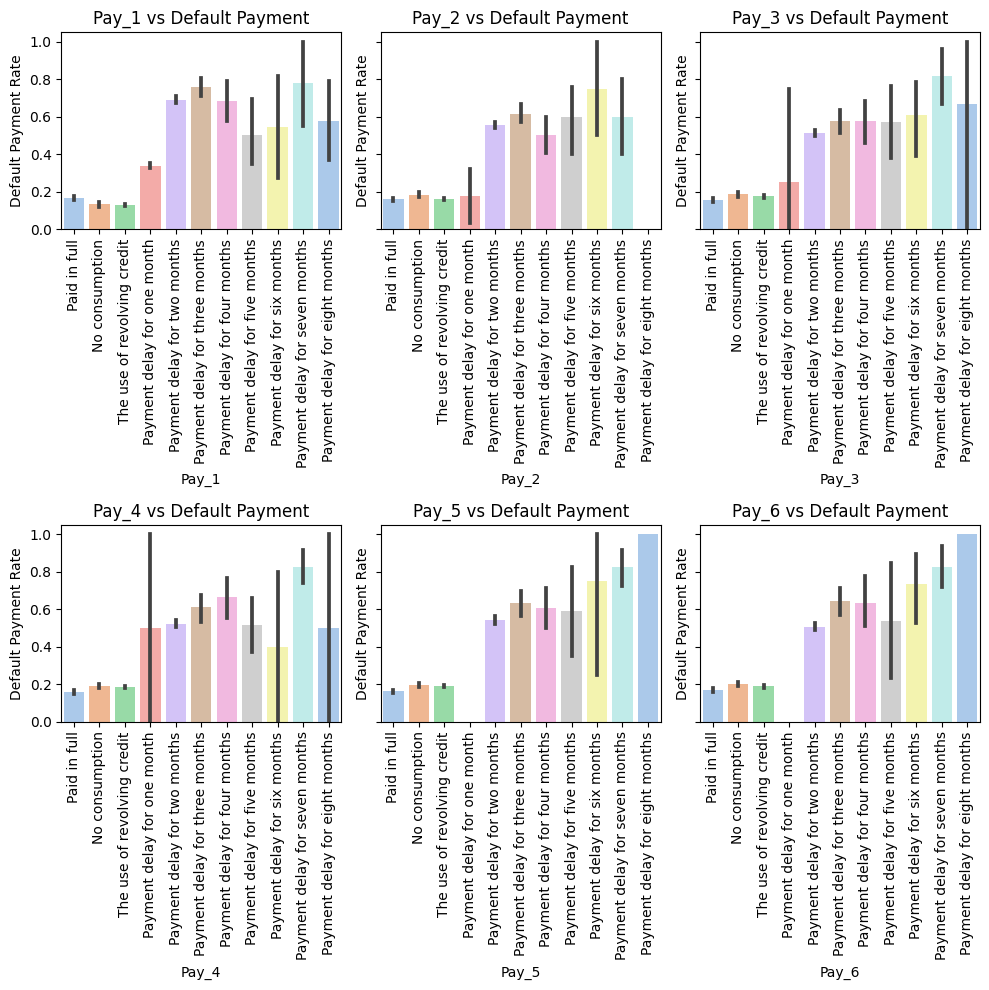

In [ ]:
sorted_list = [
    'Paid in full',
    'No consumption',
    'The use of revolving credit',
    'Payment delay for one month',
    'Payment delay for two months',
    'Payment delay for three months',
    'Payment delay for four months',
    'Payment delay for five months',
    'Payment delay for six months',
    'Payment delay for seven months',
    'Payment delay for eight months'
]

columns = ['Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']

num_subplots = len(columns)
fig, axes = plt.subplots(2, num_subplots // 2, figsize=(10, 10), sharey=True)

for i, column in enumerate(columns):
    ax = axes[i // (num_subplots // 2), i % (num_subplots // 2)]
    sns.barplot(data=Credit_Card, x=column, y="Default_Payment_Next_Month", palette="pastel", ax=ax, order = sorted_list)
    ax.set_xticks(range(len(sorted_list)))  # Set the number of ticks based on the length of sorted_list
    ax.set_xticklabels(sorted_list, rotation=90)
    ax.set_title(f"{column} vs Default Payment")
    ax.set_xlabel(column)
    ax.set_ylabel("Default Payment Rate")

plt.tight_layout()
plt.show()

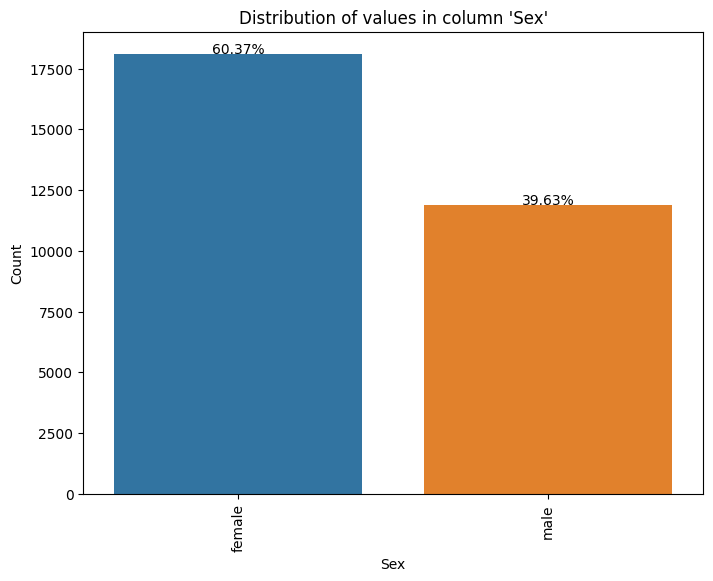

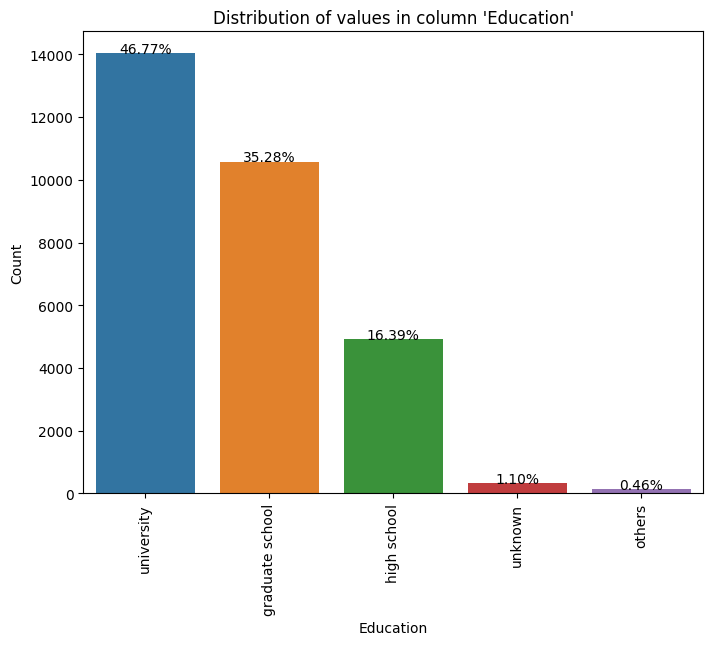

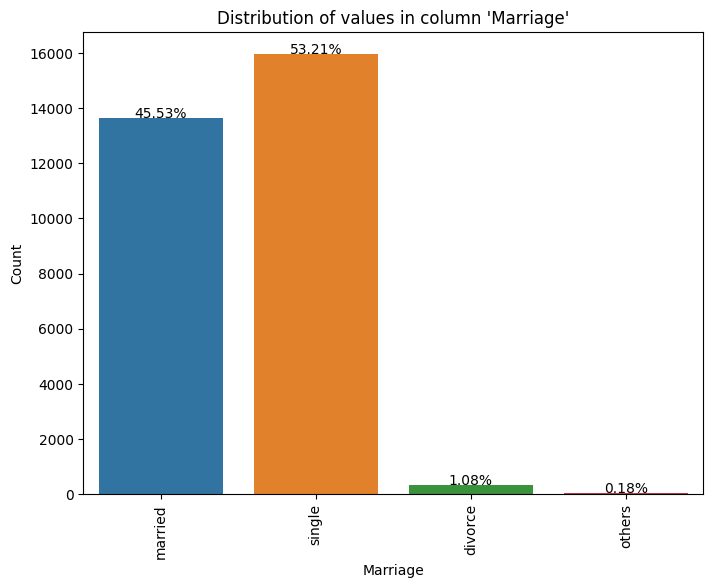

In [ ]:
columns = ['Sex', 'Education', 'Marriage']

total_samples = len(Credit_Card)

for column in columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=Credit_Card, x=column)
    plt.title(f"Distribution of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_samples) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.xticks(rotation=90)
    plt.show()

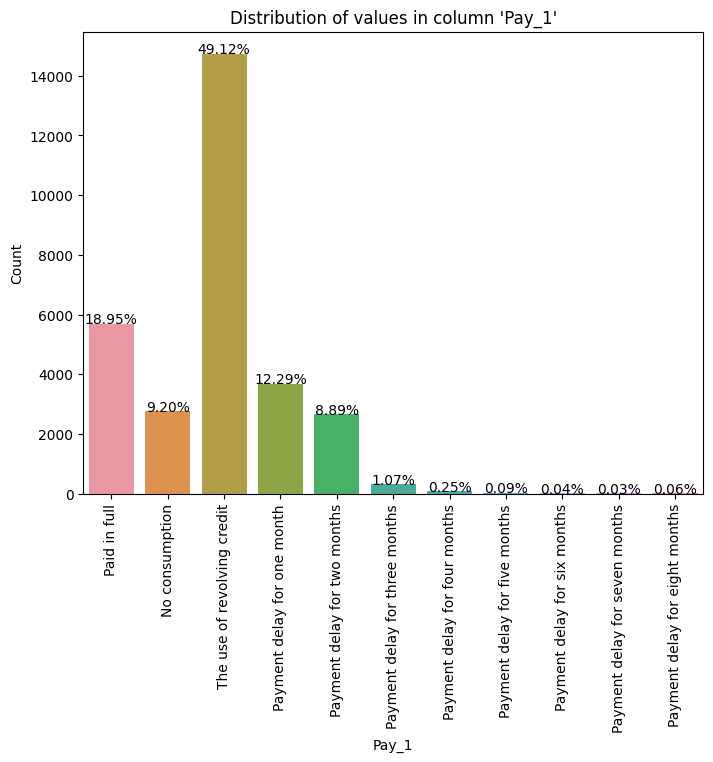

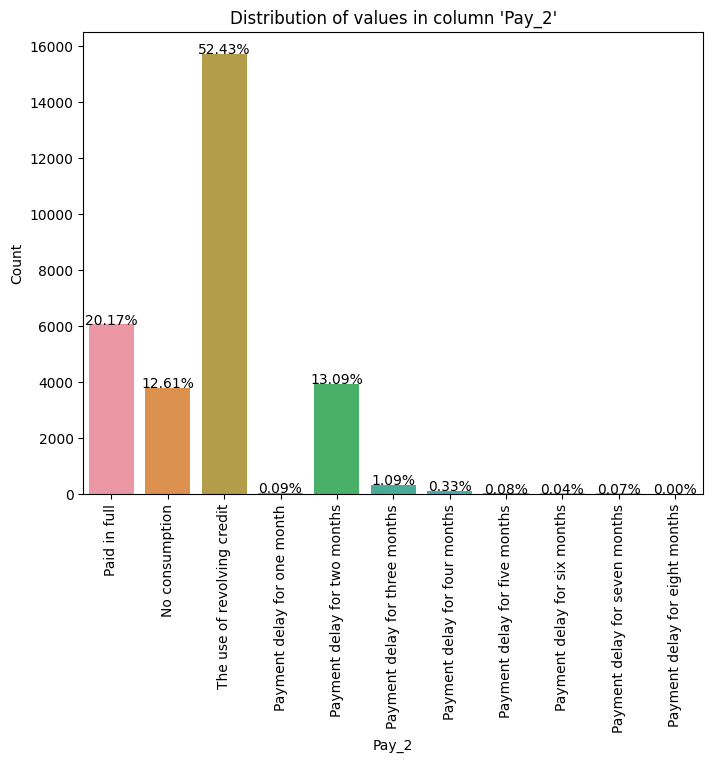

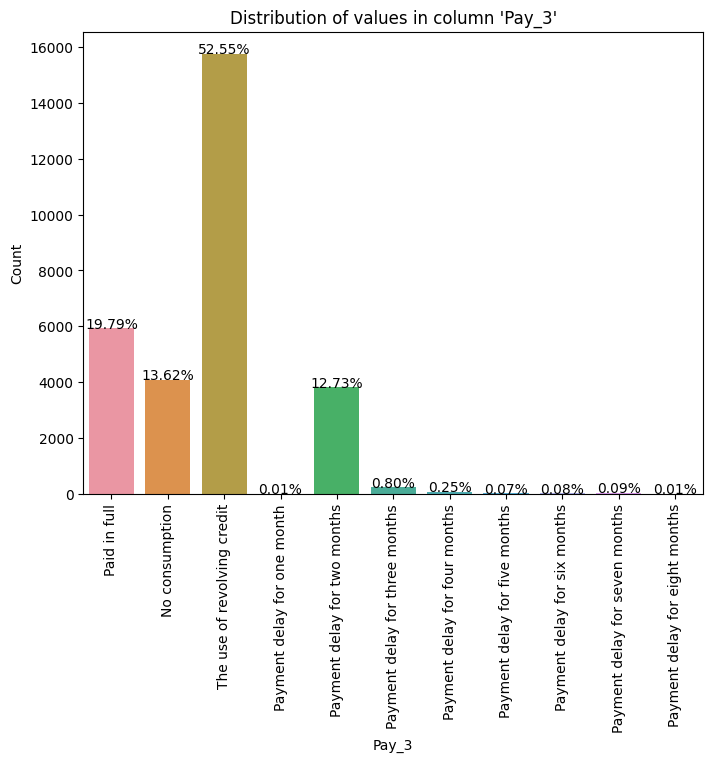

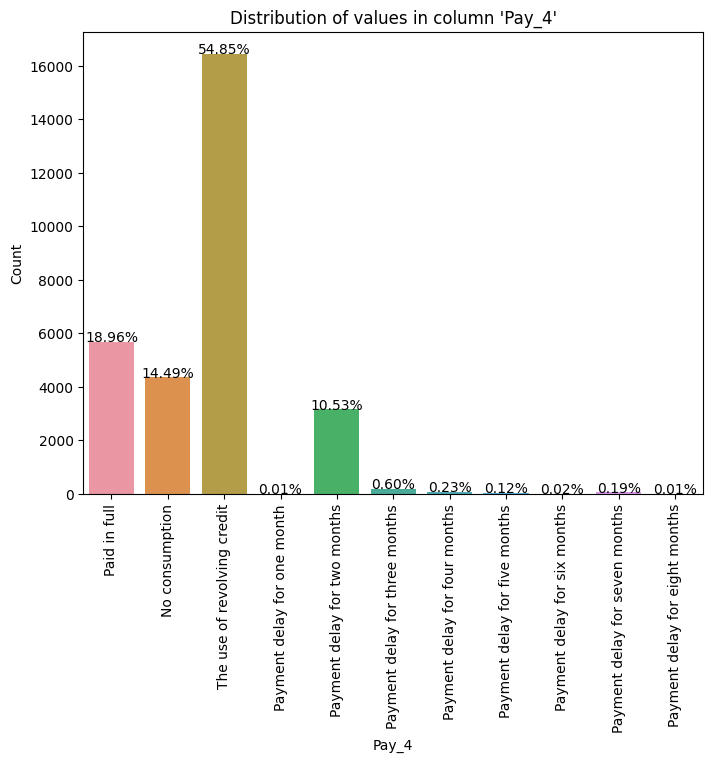

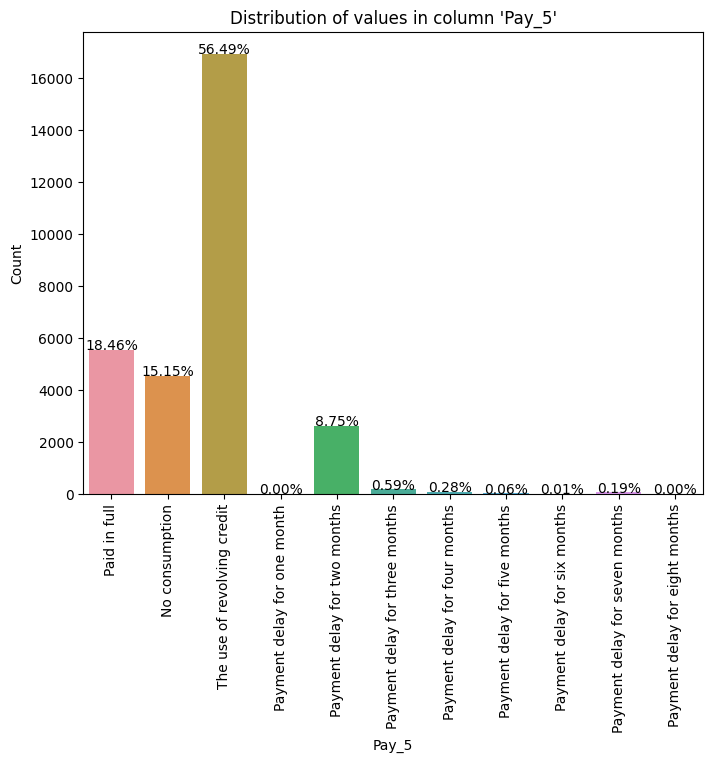

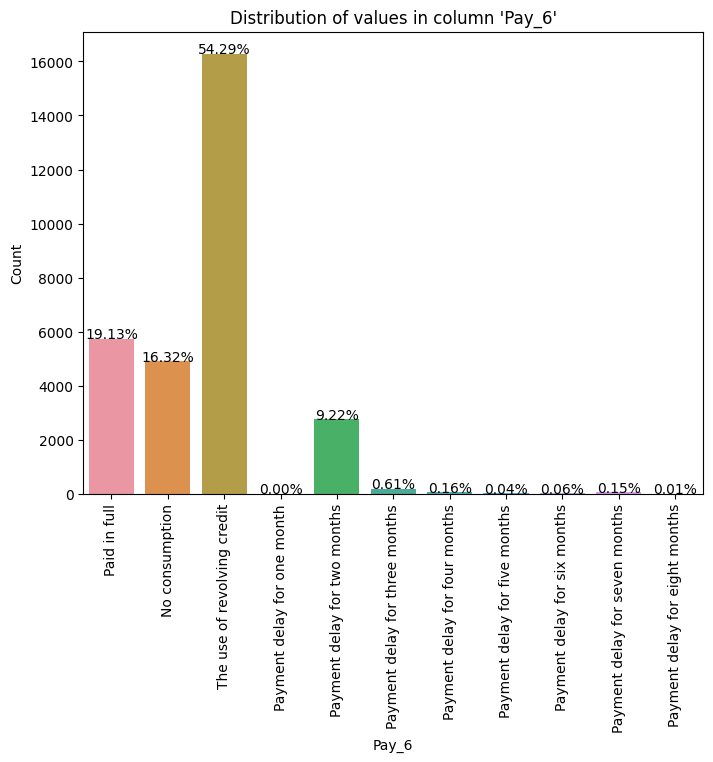

In [ ]:
columns = Credit_Card.select_dtypes(include='object').columns.tolist()
columns = [col for col in columns if col not in ['Sex', 'Education', 'Marriage']]

for column in columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=Credit_Card, x=column, order = sorted_list)
    plt.title(f"Distribution of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_samples) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.xticks(rotation=90)
    plt.show()

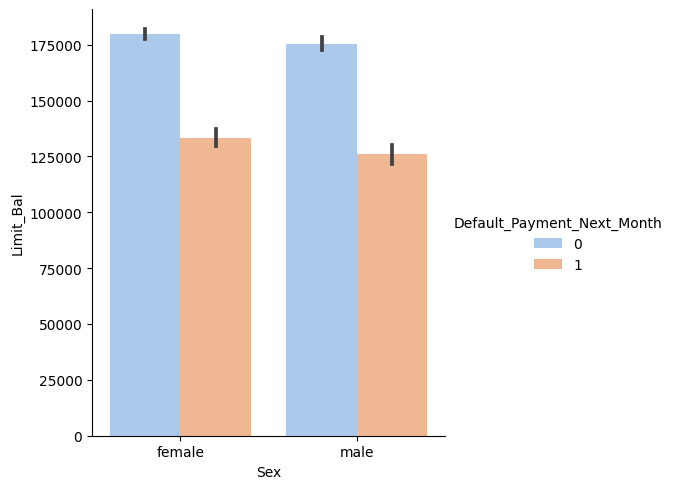

In [ ]:
sns.catplot(kind = "bar", data = Credit_Card, x = "Sex", y = "Limit_Bal", hue = "Default_Payment_Next_Month", palette = "pastel");

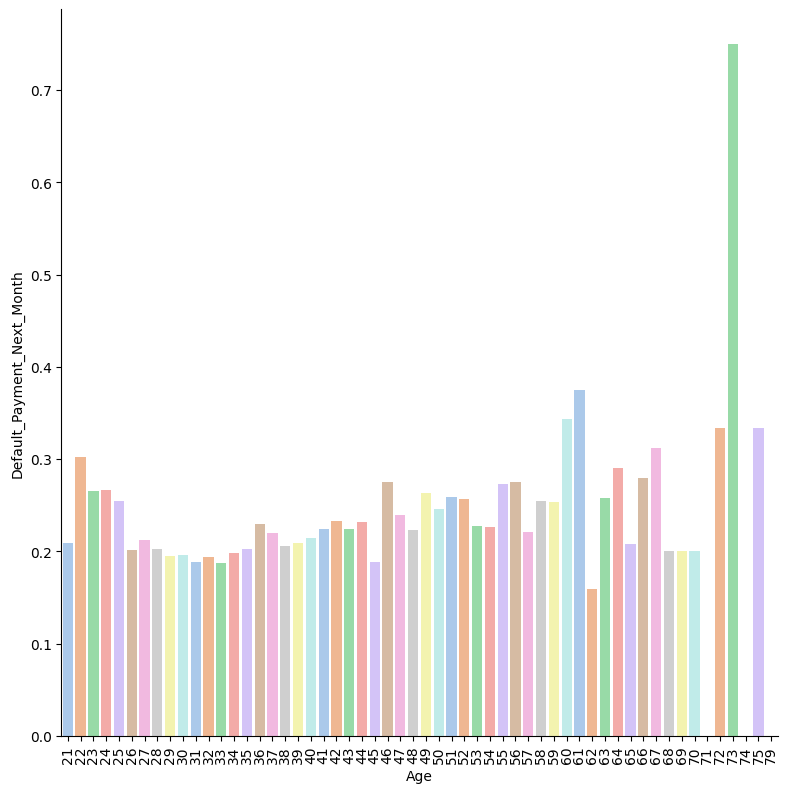

In [ ]:
age_prob = Credit_Card.groupby("Age")["Default_Payment_Next_Month"].mean().reset_index()
sns.catplot(kind = "bar", data = age_prob, x = "Age", y = "Default_Payment_Next_Month", palette = "pastel", height=8)
plt.xticks(rotation = 90);

In [ ]:
Credit_Card.loc[Credit_Card.Age == 72]

,Id,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default_Payment_Next_Month
1644,1645,50000.0,male,high school,married,72,Payment delay for two months,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,39710.0,40519.0,41324.0,1908.0,1621.0,3165.0,1600.0,1620.0,0.0,1
20264,20265,150000.0,female,high school,married,72,No consumption,No consumption,No consumption,No consumption,...,3871.0,6200.0,336.0,1250.0,0.0,3871.0,6200.0,336.0,0.0,0
25142,25143,300000.0,male,high school,married,72,Paid in full,Paid in full,Paid in full,Paid in full,...,1433.0,5522.0,3233.0,756.0,3753.0,1433.0,5522.0,0.0,27232.0,0


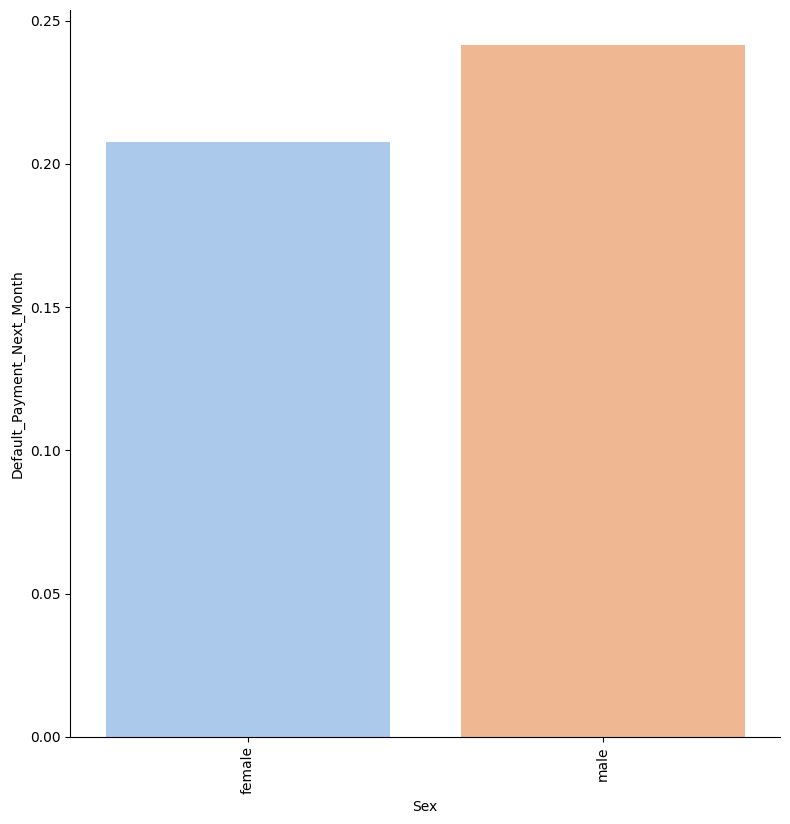

In [ ]:
gender_prob = Credit_Card.groupby("Sex")["Default_Payment_Next_Month"].mean().reset_index()
sns.catplot(kind = "bar", data = gender_prob, x = "Sex", y = "Default_Payment_Next_Month", palette = "pastel", height=8)
plt.xticks(rotation = 90);

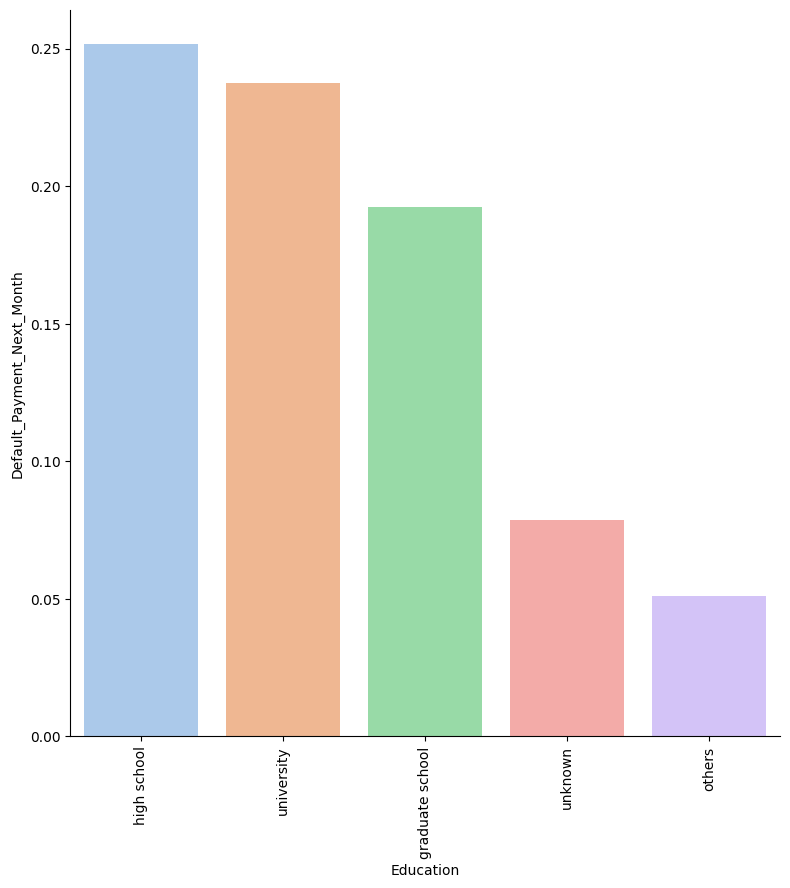

In [ ]:
education_prob = Credit_Card.groupby("Education")["Default_Payment_Next_Month"].mean().reset_index()
sns.catplot(kind = "bar", data = education_prob, x = "Education", y = "Default_Payment_Next_Month", palette = "pastel", height=8, order=["high school", "university", "graduate school", "unknown", "others"])
plt.xticks(rotation = 90);

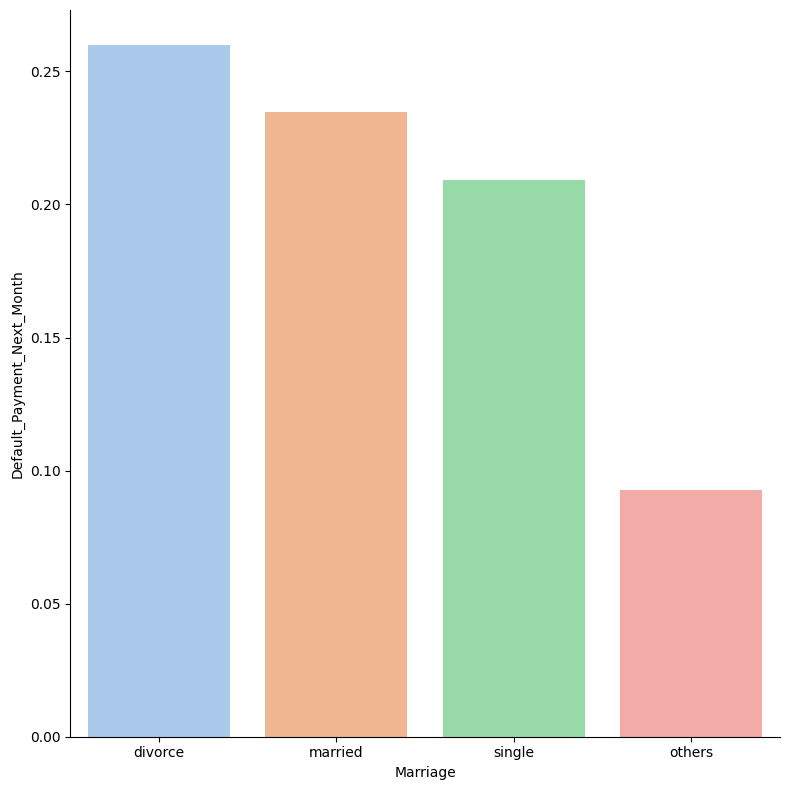

In [ ]:
marriage_prob = Credit_Card.groupby("Marriage")["Default_Payment_Next_Month"].mean().reset_index()
sns.catplot(kind = "bar", data = marriage_prob, x = "Marriage", y = "Default_Payment_Next_Month", palette = "pastel", height=8, order = ["divorce", "married", "single", "others"]);

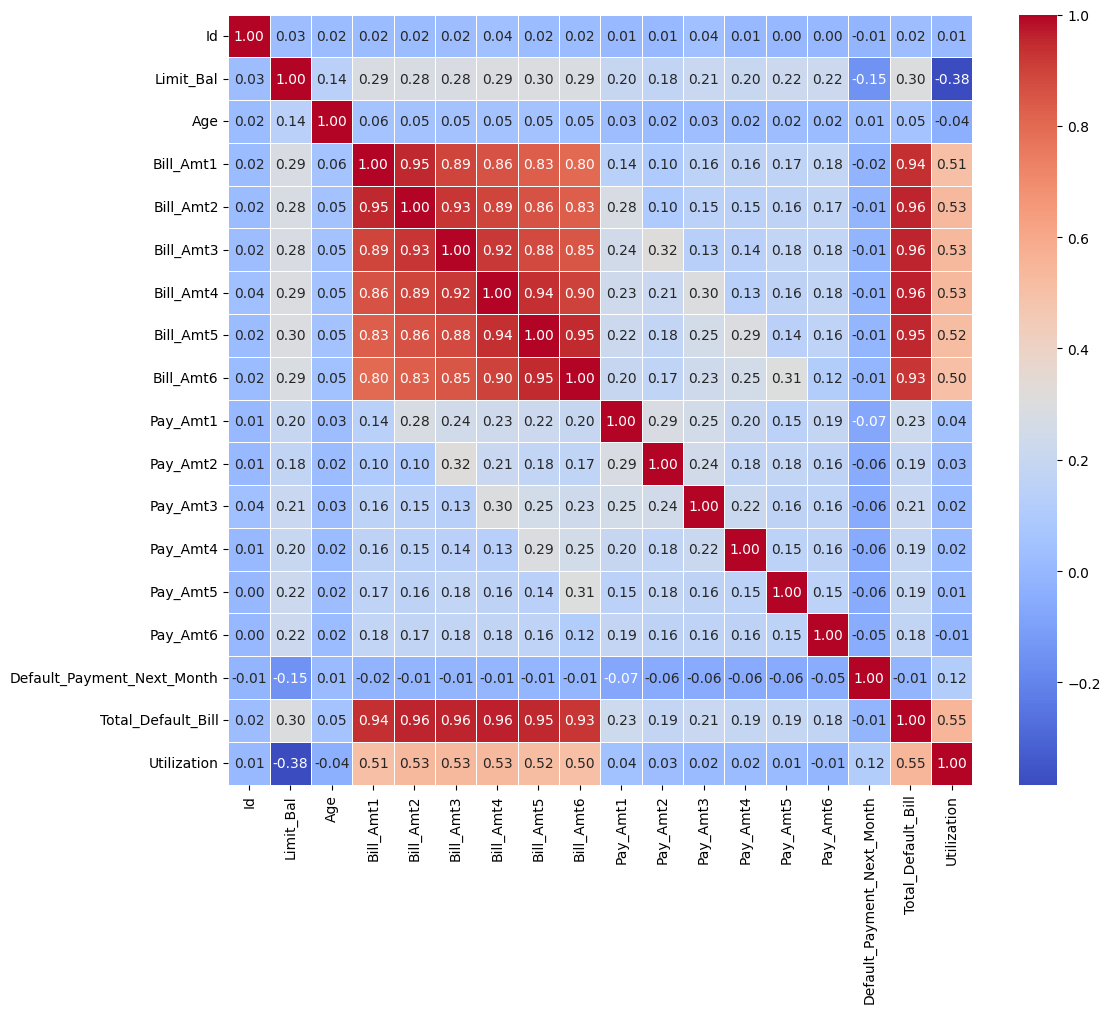

In [ ]:
corr = Credit_Card.corr(numeric_only = True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5);

# Pipeline


In [ ]:
Credit_Card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          30000 non-null  int64  
 1   Limit_Bal                   30000 non-null  float64
 2   Sex                         30000 non-null  object 
 3   Education                   30000 non-null  object 
 4   Marriage                    30000 non-null  object 
 5   Age                         30000 non-null  int64  
 6   Pay_1                       30000 non-null  object 
 7   Pay_2                       30000 non-null  object 
 8   Pay_3                       30000 non-null  object 
 9   Pay_4                       30000 non-null  object 
 10  Pay_5                       30000 non-null  object 
 11  Pay_6                       30000 non-null  object 
 12  Bill_Amt1                   30000 non-null  float64
 13  Bill_Amt2                   300

In [ ]:
columns_to_drop = ["Id", "Default_Payment_Next_Month", "Bill_Amt1", "Bill_Amt2", "Bill_Amt3", "Bill_Amt4", "Bill_Amt5", "Bill_Amt6"]
X = Credit_Card.drop(columns_to_drop, axis=1)
y = Credit_Card['Default_Payment_Next_Month'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 19), (6000, 19), (24000,), (6000,))

In [ ]:
X_train.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Total_Default_Bill,Utilization
22788,160000.0,female,university,single,33,Payment delay for two months,Payment delay for two months,Payment delay for three months,Payment delay for two months,The use of revolving credit,The use of revolving credit,15000.0,0.0,0.0,6100.0,12300.0,6100.0,992940.0,103.43
29006,150000.0,female,graduate school,single,34,Payment delay for one month,Paid in full,Paid in full,No consumption,No consumption,No consumption,53.0,0.0,0.0,0.0,0.0,0.0,53.0,0.01
16950,10000.0,male,university,married,50,Payment delay for one month,Payment delay for two months,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,2.0,1281.0,1134.0,294.0,305.0,1000.0,51461.0,85.77
22280,220000.0,female,graduate school,single,29,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,9100.0,9000.0,7887.0,4800.0,4900.0,6000.0,1117574.0,84.66
11346,310000.0,female,graduate school,single,32,Payment delay for one month,No consumption,Paid in full,The use of revolving credit,The use of revolving credit,No consumption,0.0,326.0,0.0,0.0,0.0,1200.0,182.0,0.01


In [ ]:
set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse_output=False))
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='object'))
], verbose_feature_names_out=False)
prep_pipeline.set_output(transform='pandas')

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ca9e3dedd50>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ca9e3dee5c0>)],
                  verbose_feature_names_out=False)

## Baseline Model

Across this section, we assess five distinct models, which will undergo comprehensive analysis in subsequent project stages. Following this, we implement feature engineering and hyperparameter tuning processes to enhance the initial outcomes. The key steps involved in developing this initial section are outlined below:

1.	Establishing a pipeline covering data preprocessing and model selection.
2.	Fitting the model and making predictions using the default threshold.
3.	Exploring relevant metrics.
4.	Generating the ROC curve and determining the optimal threshold.
5.	Recalculating metrics following improvements.


### Logistic Regression

Logistic regression is a statistical method used for binary classification, predicting the probability of an instance belonging to one of two classes. Despite its name, logistic regression is commonly used for classification tasks rather than regression.

In [ ]:
set_config(display='diagram')
lr_cf = make_pipeline(prep_pipeline, LogisticRegression(max_iter = 1000, n_jobs = -1))

lr_cf.fit(X_train, y_train)
print(f'The accuracy of Logistic Classification is {lr_cf.score(X_test, y_test):.4f}.')

The accuracy of Logistic Classification is 0.8170.


In [ ]:
y_pred_lr = lr_cf.predict(X_test)
Classification_report_lr = classification_report(y_test, y_pred_lr)

print(f"Classification Report:  \n {Classification_report_lr}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_lr = balanced_accuracy_score(y_test, y_pred_lr)

print(f"Balanced Accuracy: {Balanced_accuracy_lr:.4f}")

Balanced Accuracy: 0.6513


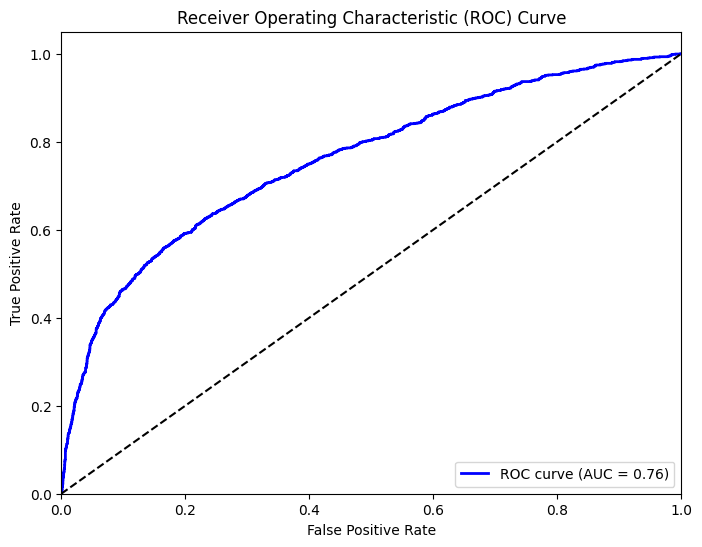

In [ ]:
y_pred_proba_lr = lr_cf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_lr = tpr - fpr
best_threshold_idx = np.argmax(youndex_lr)
best_threshold_lr = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_lr}")
y_pred_best_threshold_lr = (y_pred_proba_lr >= best_threshold_lr).astype(int)

The best threshold is 0.2103832738306345


In [ ]:
Classification_report_lr_best_threshold = classification_report(y_test, y_pred_best_threshold_lr)

print(f"Classification Report:  \n {Classification_report_lr_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4673
           1       0.47      0.58      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



In [ ]:
Balanced_accuracy_lr_best_threshold = balanced_accuracy_score(y_test, y_pred_best_threshold_lr)

print(f"Balanced Accuracy: {Balanced_accuracy_lr_best_threshold:.4f}")

Balanced Accuracy: 0.6969


**Logistic Regression Summary of results**

The results of the LR with the default hyperparameter values are the following:
*	Accuracy: 0.81
* Balance Accuracy: 0.64

The results of the LR with the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.78
* Balance Accuracy: 0.70


### K-Nearest Neighbors

KNN is a type of instance-based learning, where the algorithm classifies new data points based on the majority class of their nearest neighbors. During the prediction phase, this method calculates the distance between a new point and all existing points in the training set, the most common distance metrics are Euclidean and Manhattan. For classification, KNN takes a majority vote among the k-nearest neighbors to determine the class of the new data point, basically the class that occurs most frequently among the neighbors is assigned to the new point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_cf = make_pipeline(prep_pipeline, KNeighborsClassifier())

knn_cf.fit(X_train, y_train)

print(f'The accuracy of K-Nearest Neighboors is {knn_cf.score(X_test, y_test):.4f}.')

The accuracy of K-Nearest Neighboors is 0.8012.


In [ ]:
y_pred_knn = knn_cf.predict(X_test)
Classification_report_knn = classification_report(y_test, y_pred_knn)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.58      0.36      0.44      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



In [ ]:
Balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn:.4f}")

Balanced Accuracy: 0.6417


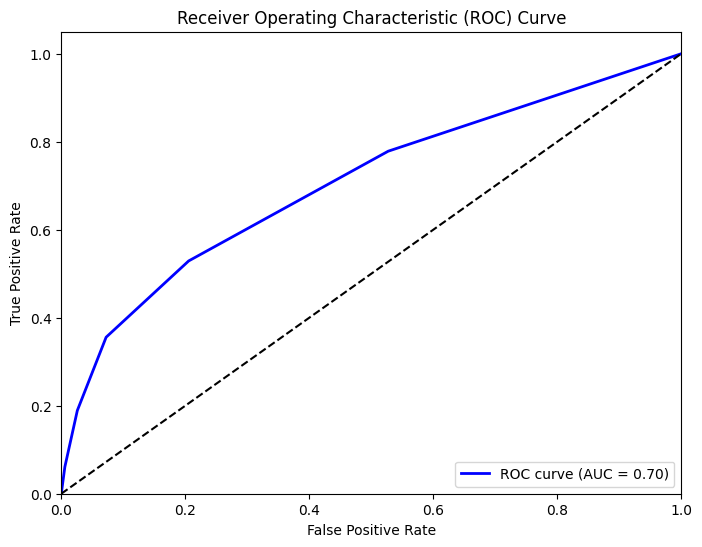

In [ ]:
y_pred_proba_knn = knn_cf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_knn = tpr - fpr
best_threshold_idx = np.argmax(youndex_knn)
best_threshold_knn = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_knn}")
y_pred_best_threshold_knn = (y_pred_proba_knn >= best_threshold_knn).astype(int)

The best threshold is 0.4


In [ ]:
Classification_report_knn_best_threshold = classification_report(y_test, y_pred_best_threshold_knn)

print(f"Classification Report:  \n {Classification_report_knn_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      4673
           1       0.42      0.53      0.47      1327

    accuracy                           0.74      6000
   macro avg       0.64      0.66      0.65      6000
weighted avg       0.76      0.74      0.75      6000



In [ ]:
Balanced_accuracy_knn_best_threshold = balanced_accuracy_score(y_test, y_pred_best_threshold_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn_best_threshold:.4f}")

Balanced Accuracy: 0.6618


**KNN Summary of results**

The results of the KNN with the default hyperparameter values are the following:
*	Accuracy: 0.79
* Balance Accuracy: 0.63

The results of the KNN with the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.73
* Balance Accuracy: 0.66


### Random Forest

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction (regression) or the mode of the predictions (classification) of the individual tree

In [ ]:
rf_pipe = make_pipeline(prep_pipeline, RandomForestClassifier(random_state=327))
rf_pipe.fit(X_train, y_train)

rf_pipe.fit(X_train, y_train)

print(f'The accuracy of Random Forest is {rf_pipe.score(X_test, y_test):.4f}.')

The accuracy of Random Forest is 0.8133.


In [ ]:
y_pred_rf = rf_pipe.predict(X_test)
Classification_report_knn = classification_report(y_test, y_pred_rf)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
Balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

print(f"Balanced Accuracy: {Balanced_accuracy_rf:.4f}")

Balanced Accuracy: 0.6527


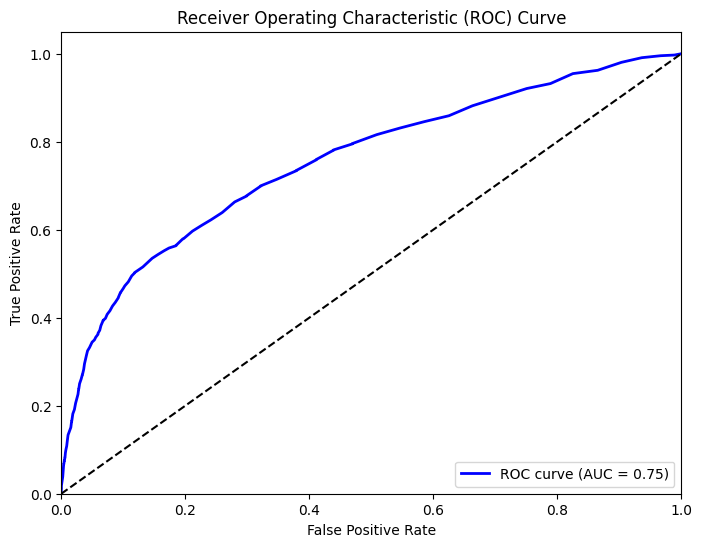

In [ ]:
y_pred_proba_rf = rf_pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_rf = tpr - fpr
best_threshold_idx = np.argmax(youndex_rf)
best_threshold_rf = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_rf}")
y_pred_best_threshold_rf = (y_pred_proba_rf >= best_threshold_rf).astype(int)

The best threshold is 0.32


In [ ]:
classification_report_rf_best_threshold = classification_report(y_test, y_pred_best_threshold_rf)
print(f"Classification Report: \n{classification_report_rf_best_threshold}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4673
           1       0.51      0.54      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [ ]:
Balanced_accuracy_rf_best_threshold = balanced_accuracy_score(y_test, y_pred_best_threshold_rf)

print(f"Balanced Accuracy: {Balanced_accuracy_rf_best_threshold:.4f}")

Balanced Accuracy: 0.6942


**Random Forest Summary of results**

The results of the RF with the default hyperparameter values are the following:
*	Accuracy: 0.81
* Balance Accuracy: 0.65

The results of the RF with the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.78
* Balance Accuracy: 0.69


### XGBoost

XGBoost is an extension of traditional gradient boosting methods, designed to optimize efficiency, speed, and model accuracy. What sets XGBoost apart is its ability to handle diverse data types, feature selection, and regularization techniques, making it a robust choice for various applications such as classification, regression, and ranking problems.

In [ ]:
X_train_prep = prep_pipeline.fit_transform(X_train)
y_train_prep = y_train

X_test_prep = prep_pipeline.transform(X_test)
y_test_prep = y_test

X_train.shape, X_train_prep.shape, y_train_prep.shape, X_test_prep.shape, y_test_prep.shape

((24000, 19), (24000, 85), (24000,), (6000, 85), (6000,))

In [ ]:
X_train_prep_training, X_train_prep_validation, y_train_prep_training, y_train_prep_validation = train_test_split(X_train_prep, y_train_prep, test_size = 0.2, random_state=327)

bst = XGBClassifier(n_estimators=100,
                    max_leaves=16,
                    learning_rate=0.1,
                    eval_metric='error',
                    early_stopping_rounds=10,
                    objective='binary:logistic')
bst.fit(X_train_prep_training, y_train_prep_training, eval_set=[(X_train_prep_validation, y_train_prep_validation)], verbose=False)

print(f'The accuracy of XGBoost is {bst.score(X_test_prep, y_test_prep):.4f}.')
print(f'The model converges at {bst.best_iteration}.')

The accuracy of XGBoost is 0.8158.
The model converges at 21.


In [ ]:
y_pred_xg = bst.predict(X_test_prep)
Classification_report_xg = classification_report(y_test_prep, y_pred_xg)

print(f"Classification Report:  \n {Classification_report_xg}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.32      0.43      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
Balanced_accuracy_xg = balanced_accuracy_score(y_test_prep, y_pred_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg:.4f}")

Balanced Accuracy: 0.6381


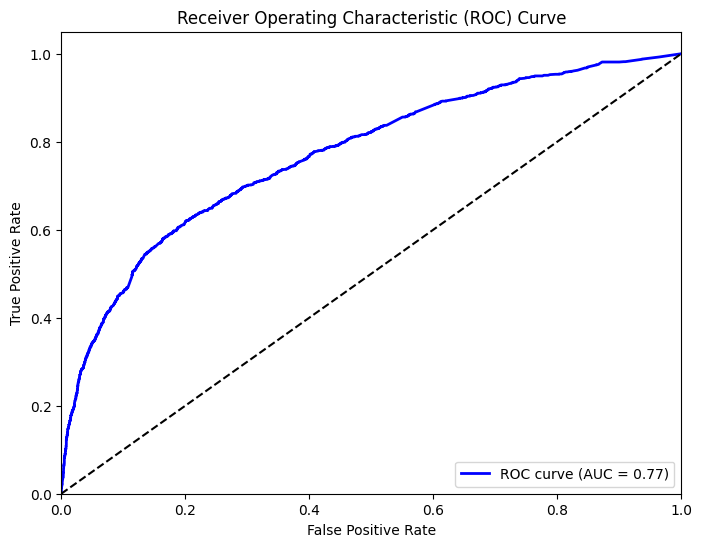

In [ ]:
y_pred_proba_xg = bst.predict_proba(X_test_prep)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_xg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_xg = tpr - fpr
best_threshold_idx = np.argmax(youndex_xg)
best_threshold_xg = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_xg}")
y_pred_best_threshold_xg = (y_pred_proba_xg >= best_threshold_xg).astype(int)

The best threshold is 0.22005052864551544


In [ ]:
Classification_report_xg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_xg)

print(f"Classification Report:  \n {Classification_report_xg_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
Balanced_accuracy_xg_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg_best_threshold:.4f}")

Balanced Accuracy: 0.7096


**XGBoost Summary of results**

The results of the XGBoost with the default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.64

The results of the XGBoost with the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.71


### Gaussian Naive Bayes

Naïve Bayes is a probabilistic machine learning algorithm used for many classification functions and is based on the Bayes theorem. Gaussian Naïve Bayes is the extension of naïve Bayes. While other functions are used to estimate data distribution, Gaussian or normal distribution is the simplest to implement as you will need to calculate the mean and standard deviation for the training data.

In [ ]:
Bayes_cf = make_pipeline(prep_pipeline, GaussianNB())

Bayes_cf.fit(X_train, y_train)

print(f'The accuracy of Gaussian Naive Bayes is {Bayes_cf.score(X_test, y_test):.4f}.')

The accuracy of Gaussian Naive Bayes is 0.7903.


In [ ]:
y_pred_bayes = Bayes_cf.predict(X_test)
Classification_report_bayes = classification_report(y_test, y_pred_bayes)

print(f"Classification Report:  \n {Classification_report_bayes}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      4673
           1       0.64      0.12      0.20      1327

    accuracy                           0.79      6000
   macro avg       0.72      0.55      0.54      6000
weighted avg       0.76      0.79      0.73      6000



In [ ]:
Balanced_accuracy_bayes = balanced_accuracy_score(y_test, y_pred_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes:.4f}")

Balanced Accuracy: 0.5511


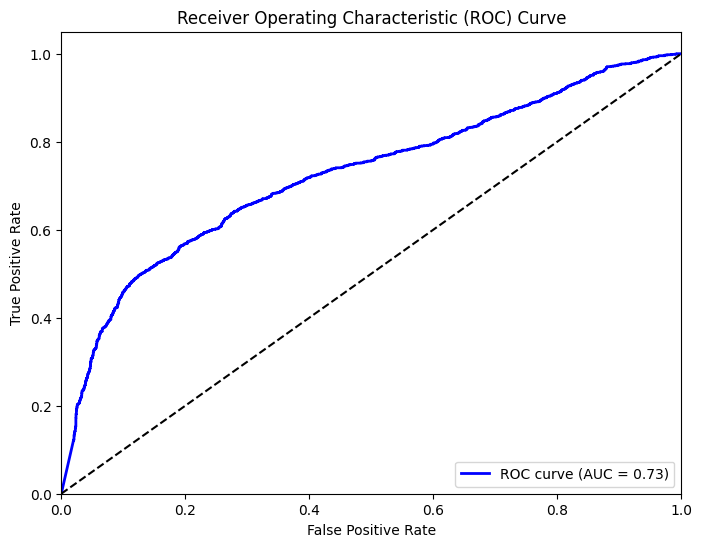

In [ ]:
y_pred_proba_bayes = Bayes_cf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_bayes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_bayes = tpr - fpr
best_threshold_idx = np.argmax(youndex_bayes)
best_threshold_bayes = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_bayes}")
y_pred_best_threshold_bayes = (y_pred_proba_bayes >= best_threshold_bayes).astype(int)

The best threshold is 2.696204739724125e-21


In [ ]:
Classification_report_bayes_best_threshold = classification_report(y_test, y_pred_best_threshold_bayes)

print(f"Classification Report:  \n {Classification_report_bayes_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.53      0.50      0.51      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000



In [ ]:
Balanced_accuracy_bayes_best_threshold = balanced_accuracy_score(y_test, y_pred_best_threshold_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes_best_threshold:.4f}")

Balanced Accuracy: 0.6858


**GNB Summary of results**

The results of the GNB with the default hyperparameter values are the following:
*	Accuracy: 0.79
* Balance Accuracy: 0.55

The results of the GNB with the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.79
* Balance Accuracy: 0.69

## Feature Selection

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

### Recursive Feature Selection Random Forest

Since it takes a long time to converge, we will comment out the feature selection and only keep the feature selected in a filter list

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression

# rfecv = RFECV(RandomForestClassifier(random_state=327), scoring='balanced_accuracy', n_jobs=-1)

# rfecv_pipe = Pipeline([
#     ('select', rfecv)
# ])

# rfecv_pipe.fit(X_train_prep, y_train_prep)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.title("RFECV - Optimal Number of Features")
# plt.xlabel("Number of Features Selected")
# plt.ylabel("Balanced ")
# mean_score = rfecv.cv_results_['mean_test_score']
# plt.plot(range(1, len(mean_score) + 1), mean_score)

# optimal_num_features = rfecv.n_features_
# optimal_balanced_accuracy = rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
# print(f"Optimal number of features: {optimal_num_features}")
# print(f"Selected features: {X_train_prep.columns[rfecv.support_]}")
# print(f"Balanced Accuracy at optimal number of features: {optimal_balanced_accuracy}")

In [ ]:
# pd.DataFrame(rfecv.cv_results_['mean_test_score']).sort_values(by = 0, ascending = False)

In [ ]:
filter = ['Limit_Bal', 'Age', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4',
       'Pay_Amt5', 'Pay_Amt6', 'Total_Default_Bill', 'Utilization',
       'Sex_female', 'Sex_male', 'Education_graduate school',
       'Education_high school', 'Education_university', 'Education_unknown',
       'Marriage_divorce', 'Marriage_married', 'Marriage_single',
       'Pay_1_No consumption', 'Pay_1_Paid in full',
       'Pay_1_Payment delay for one month',
       'Pay_1_Payment delay for three months',
       'Pay_1_Payment delay for two months',
       'Pay_1_The use of revolving credit', 'Pay_2_No consumption',
       'Pay_2_Paid in full', 'Pay_2_Payment delay for three months',
       'Pay_2_Payment delay for two months',
       'Pay_2_The use of revolving credit', 'Pay_3_No consumption',
       'Pay_3_Paid in full', 'Pay_3_Payment delay for three months',
       'Pay_3_Payment delay for two months',
       'Pay_3_The use of revolving credit', 'Pay_4_No consumption',
       'Pay_4_Paid in full', 'Pay_4_Payment delay for two months',
       'Pay_4_The use of revolving credit', 'Pay_5_No consumption',
       'Pay_5_Paid in full', 'Pay_5_Payment delay for two months',
       'Pay_5_The use of revolving credit', 'Pay_6_No consumption',
       'Pay_6_Paid in full', 'Pay_6_Payment delay for three months',
       'Pay_6_Payment delay for two months',
       'Pay_6_The use of revolving credit']

In [ ]:
X_train_prep_filtered = X_train_prep[filter]
X_test_prep_filtered = X_test_prep[filter]

### Recursive Feature Selection with Logistic Regression

In [ ]:
# rfecv_lr = RFECV(LogisticRegression(max_iter=1000, n_jobs=-1), scoring='balanced_accuracy')
#
# rfecv_lr_pipe = Pipeline([
#     ('select', rfecv_lr)
# ])
#
# rfecv_lr_pipe.fit(X_train_prep, y_train_prep)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.title("RFECV - Optimal Number of Features")
# plt.xlabel("Number of Features Selected")
# plt.ylabel("Balanced Accuracy")
# mean_score = rfecv_lr.cv_results_['mean_test_score']
# plt.plot(range(1, len(mean_score) + 1), mean_score)
#
# optimal_num_features = rfecv_lr.n_features_
# optimal_balanced_accuracy = rfecv_lr.cv_results_['mean_test_score'][optimal_num_features - 1]
# print(f"Optimal number of features: {optimal_num_features}")
# print(f"Selected features: {X_train_prep.columns[rfecv_lr.support_]}")
# print(f"Balanced Accuracy at optimal number of features: {optimal_balanced_accuracy}")

In [ ]:
filter_2 = ['Education_others', 'Education_unknown', 'Marriage_others',
       'Pay_1_No consumption', 'Pay_1_Paid in full',
       'Pay_1_Payment delay for four months',
       'Pay_1_Payment delay for seven months',
       'Pay_1_Payment delay for three months',
       'Pay_1_Payment delay for two months',
       'Pay_1_The use of revolving credit',
       'Pay_3_Payment delay for six months',
       'Pay_4_Payment delay for five months',
       'Pay_4_Payment delay for seven months',
       'Pay_5_Payment delay for two months',
       'Pay_6_Payment delay for three months']

## Feature Selected Model

We will be running the new models with the feature selected from the first Recursive Feature Selection with Random Forest.

### Logistic Regression with Feature Selection

In [ ]:
logreg_filtered = LogisticRegression(max_iter=1000, random_state=327)
logreg_filtered.fit(X_train_prep_filtered, y_train_prep)

# Evaluate the model on the test set
accuracy = logreg_filtered.score(X_test_prep_filtered, y_test_prep)
print(f'The accuracy of logistic regression is {accuracy:.4f}.')

The accuracy of logistic regression is 0.8173.


In [ ]:
y_pred_lr = logreg_filtered.predict(X_test_prep_filtered)
Classification_report_lr = classification_report(y_test_prep, y_pred_lr)

print(f"Classification Report:  \n {Classification_report_lr}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_lr = balanced_accuracy_score(y_test_prep, y_pred_lr)

print(f"Balanced Accuracy: {Balanced_accuracy_lr:.4f}")

Balanced Accuracy: 0.6518


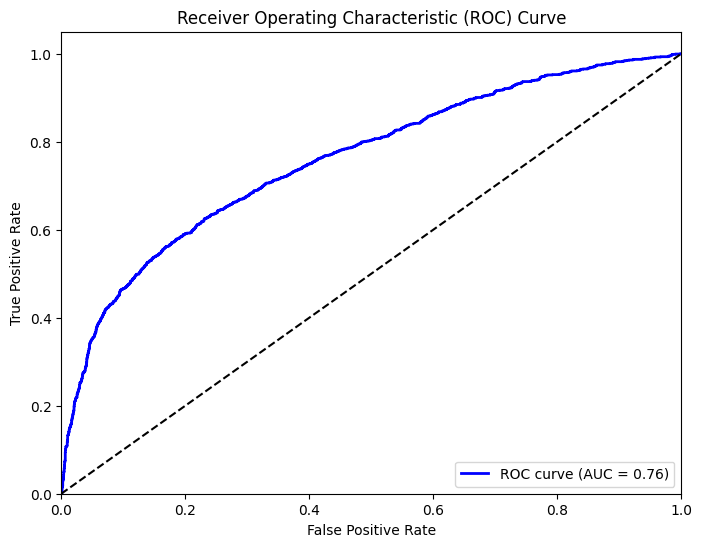

In [ ]:
y_pred_proba_logreg_filtered = logreg_filtered.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_logreg_filtered)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_lr = tpr - fpr
best_threshold_idx = np.argmax(youndex_lr)
best_threshold_lr = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_lr}")
y_pred_best_threshold_lr_filtered = (y_pred_proba_logreg_filtered >= best_threshold_lr).astype(int)

The best threshold is 0.18626280604071174


In [ ]:
classification_report_logreg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_lr_filtered)
print(f"Classification Report: \n{classification_report_logreg_best_threshold}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4673
           1       0.43      0.63      0.51      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.75      6000



In [ ]:
Balanced_accuracy_logreg_filtered_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_lr_filtered)

print(f"Balanced Accuracy: {Balanced_accuracy_logreg_filtered_best_threshold:.4f}")

Balanced Accuracy: 0.6971


**LR Summary of results**

The results of the LR with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.65

The results of the LR with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.74
* Balance Accuracy: 0.70

### K-Nearest Neighbors with Feature Selection





In [ ]:
knn_cf = KNeighborsClassifier()

knn_cf.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of KNN is {knn_cf.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of KNN is 0.8012.


In [ ]:
y_pred_knn = knn_cf.predict(X_test_prep_filtered)
Classification_report_knn = classification_report(y_test_prep, y_pred_knn)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.58      0.36      0.44      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



In [ ]:
Balanced_accuracy_knn = balanced_accuracy_score(y_test_prep, y_pred_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn:.4f}")

Balanced Accuracy: 0.6422


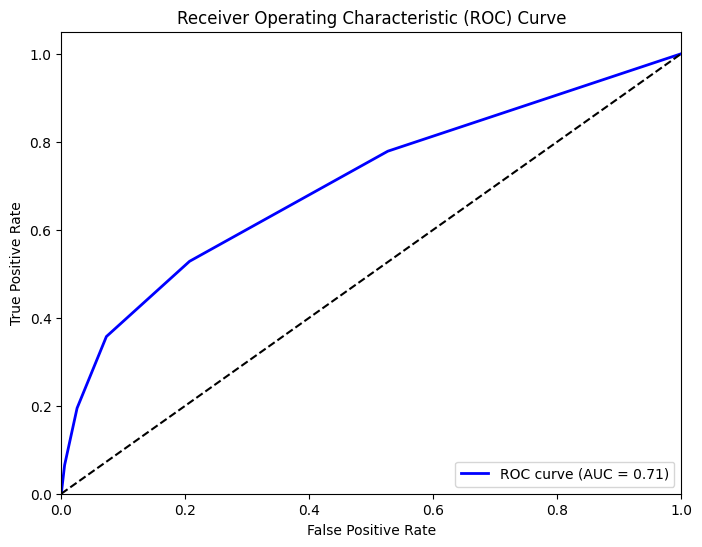

In [ ]:
y_pred_proba_knn = knn_cf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_knn = tpr - fpr
best_threshold_idx = np.argmax(youndex_knn)
best_threshold_knn = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_knn}")
y_pred_best_threshold_knn = (y_pred_proba_knn >= best_threshold_knn).astype(int)

The best threshold is 0.4


In [ ]:
Classification_report_knn_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_knn)

print(f"Classification Report:  \n {Classification_report_knn_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      4673
           1       0.42      0.53      0.47      1327

    accuracy                           0.73      6000
   macro avg       0.64      0.66      0.65      6000
weighted avg       0.76      0.73      0.74      6000



In [ ]:
Balanced_accuracy_knn_filtered_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn_filtered_best_threshold:.4f}")

Balanced Accuracy: 0.6607


**KNN Summary of results**

The results of the KNN with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.80
* Balance Accuracy: 0.64

The results of the KNN with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.73
* Balance Accuracy: 0.66

### Random Forest with Feature Selection



In [ ]:
rf_filtered = RandomForestClassifier(random_state=327)

rf_filtered.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of random forrest is {rf_filtered.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of random forrest is 0.8153.


In [ ]:
y_pred_rf = rf_filtered.predict(X_test_prep_filtered)
Classification_report_knn = classification_report(y_test_prep, y_pred_rf)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_rf = balanced_accuracy_score(y_test_prep, y_pred_rf)

print(f"Balanced Accuracy: {Balanced_accuracy_rf:.4f}")

Balanced Accuracy: 0.6562


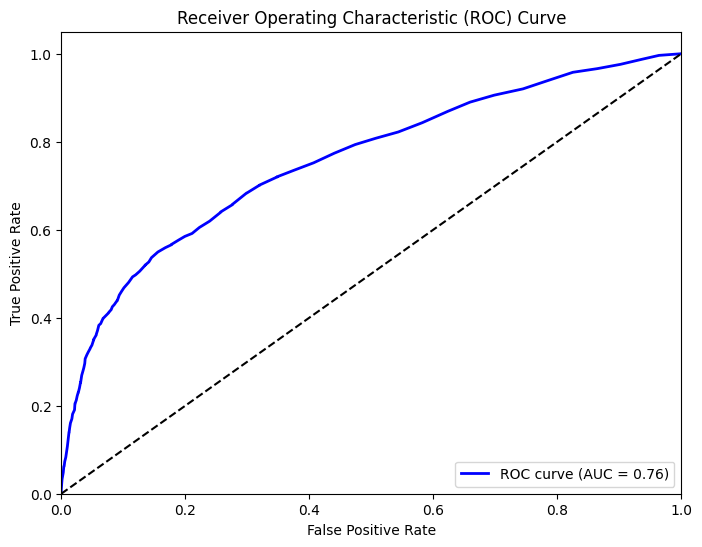

In [ ]:
y_pred_proba_random_forest_filtered = rf_filtered.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_random_forest_filtered)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_rf = tpr - fpr
best_threshold_idx = np.argmax(youndex_rf)
best_threshold_rf = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_rf}")
y_pred_best_threshold_rf_filtered = (y_pred_proba_random_forest_filtered >= best_threshold_rf).astype(int)

The best threshold is 0.31


In [ ]:
classification_report_random_forest_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_rf_filtered)
print(f"Classification Report: \n{classification_report_random_forest_best_threshold}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



In [ ]:
Balanced_accuracy_random_forest_filtered_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_rf_filtered)

print(f"Balanced Accuracy: {Balanced_accuracy_random_forest_filtered_best_threshold:.4f}")

Balanced Accuracy: 0.6969


**RF Summary of results**

The results of the RF with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.66

The results of the RF with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.78
* Balance Accuracy: 0.70


### XGBoost with Feature Selection

In [ ]:
X_train_prep_filtered_training, X_train_prep_filtered_validation, y_train_prep_filtered_training, y_train_prep_filtered_validation = train_test_split(X_train_prep_filtered, y_train_prep, test_size = 0.2, random_state=327)

bst = XGBClassifier(n_estimators=100,
                    max_leaves=16,
                    learning_rate=0.1,
                    eval_metric='error',
                    early_stopping_rounds=10,
                    objective='binary:logistic')
bst.fit(X_train_prep_filtered_training, y_train_prep_filtered_training, eval_set=[(X_train_prep_filtered_validation, y_train_prep_filtered_validation)], verbose=False)

print(f'The accuracy of XGBoost is {bst.score(X_test_prep_filtered, y_test_prep):.4f}.')
print(f'The model converges at {bst.best_iteration}.')

The accuracy of XGBoost is 0.8163.
The model converges at 25.


In [ ]:
y_pred_xg = bst.predict(X_test_prep_filtered)
Classification_report_xg = classification_report(y_test_prep, y_pred_xg)

print(f"Classification Report:  \n {Classification_report_xg}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
Balanced_accuracy_xg = balanced_accuracy_score(y_test_prep, y_pred_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg:.4f}")

Balanced Accuracy: 0.6428


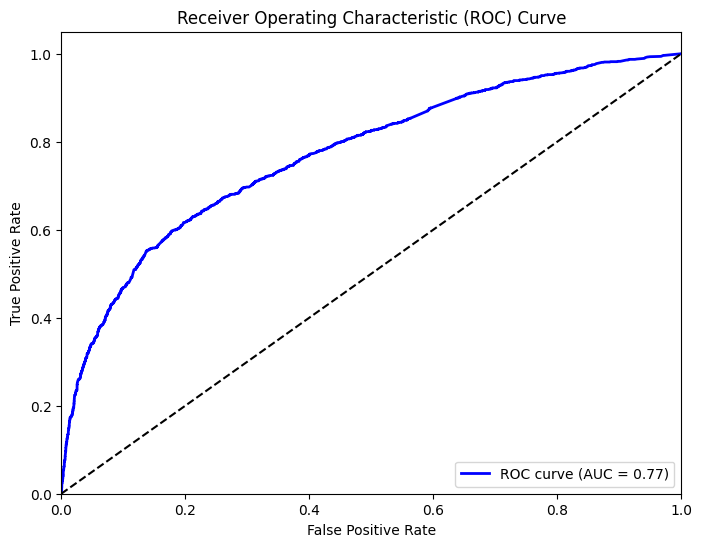

In [ ]:
y_pred_proba_xg = bst.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_xg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_xg = tpr - fpr
best_threshold_idx = np.argmax(youndex_xg)
best_threshold_xg = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_xg}")
y_pred_best_threshold_xg = (y_pred_proba_xg >= best_threshold_xg).astype(int)

The best threshold is 0.2215922772884369


In [ ]:
Classification_report_xg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_xg)

print(f"Classification Report:  \n {Classification_report_xg_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
Balanced_accuracy_xg_filtered_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg_filtered_best_threshold:.4f}")

Balanced Accuracy: 0.7097


**XGBoost Summary of results**

The results of the XGBoost with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.64

The results of the XGBoost with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.71

### Gaussian Naive Bayes with Feature Selection

In [ ]:
Bayes_cf = GaussianNB()

Bayes_cf.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of Gaussian Naive Bayes is {Bayes_cf.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of Gaussian Naive Bayes is 0.7827.


In [ ]:
y_pred_bayes = Bayes_cf.predict(X_test_prep_filtered)
Classification_report_bayes = classification_report(y_test_prep, y_pred_bayes)

print(f"Classification Report:  \n {Classification_report_bayes}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.51      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
Balanced_accuracy_bayes = balanced_accuracy_score(y_test_prep, y_pred_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes:.4f}")

Balanced Accuracy: 0.6835


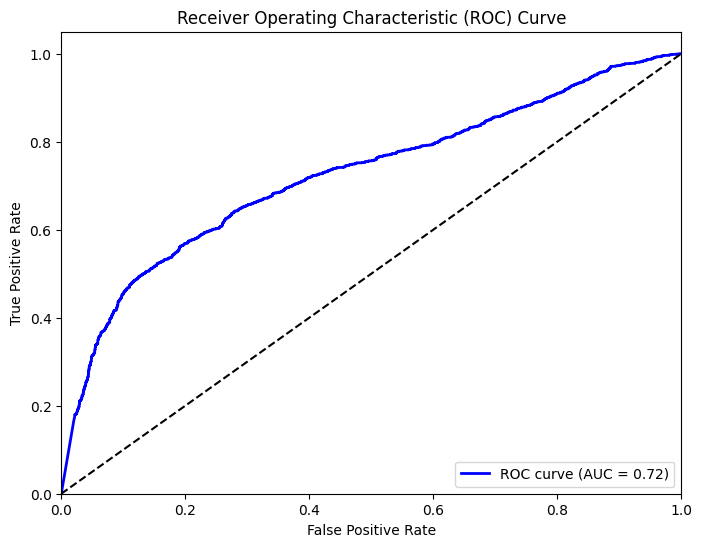

In [ ]:
y_pred_proba_bayes = Bayes_cf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_bayes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_bayes = tpr - fpr
best_threshold_idx = np.argmax(youndex_bayes)
best_threshold_bayes = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_bayes}")
y_pred_best_threshold_bayes = (y_pred_proba_bayes >= best_threshold_bayes).astype(int)

The best threshold is 0.013452517054571057


In [ ]:
Classification_report_bayes_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_bayes)

print(f"Classification Report:  \n {Classification_report_bayes_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.46      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



In [ ]:
Balanced_accuracy_bayes_filtered_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes_filtered_best_threshold:.4f}")

Balanced Accuracy: 0.6851


**GNB Summary of results**

The results of the GNB with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.78
* Balance Accuracy: 0.68

The results of the GNB with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.75
* Balance Accuracy: 0.69

## Feature Selection With Logistic Regression


We will be running the new models with the feature selected from the first Recursive Feature Selection with Logistic Regression.

In [ ]:
filter_2 = ['Education_others', 'Education_unknown', 'Marriage_others',
       'Pay_1_No consumption', 'Pay_1_Paid in full',
       'Pay_1_Payment delay for four months',
       'Pay_1_Payment delay for seven months',
       'Pay_1_Payment delay for three months',
       'Pay_1_Payment delay for two months',
       'Pay_1_The use of revolving credit',
       'Pay_3_Payment delay for six months',
       'Pay_4_Payment delay for five months',
       'Pay_4_Payment delay for seven months',
       'Pay_5_Payment delay for two months',
       'Pay_6_Payment delay for three months']

In [ ]:
X_train_prep_filtered_2 = X_train_prep[filter_2]
X_test_prep_filtered_2 = X_test_prep[filter_2]

### Linear Regression with Feature Selection with Logistic Regression

In [ ]:
logreg_filtered_2 = LogisticRegression(max_iter=1000, random_state=42)
logreg_filtered_2.fit(X_train_prep_filtered_2, y_train_prep)

# Evaluate the model on the test set
accuracy = logreg_filtered_2.score(X_test_prep_filtered_2, y_test_prep)
print(f'The accuracy of logistic regression is {accuracy:.4f}.')

The accuracy of logistic regression is 0.8190.


In [ ]:
y_pred_lr = logreg_filtered_2.predict(X_test_prep_filtered_2)
Classification_report_lr = classification_report(y_test_prep, y_pred_lr)

print(f"Classification Report:  \n {Classification_report_lr}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_lr = balanced_accuracy_score(y_test_prep, y_pred_lr)

print(f"Balanced Accuracy: {Balanced_accuracy_lr:.4f}")

Balanced Accuracy: 0.6574


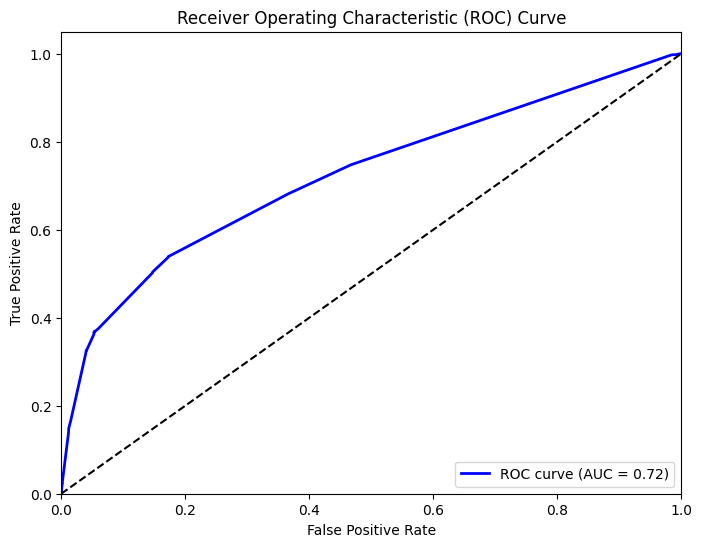

In [ ]:
y_pred_proba_logreg_filtered_2 = logreg_filtered_2.predict_proba(X_test_prep_filtered_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_logreg_filtered_2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_lr = tpr - fpr
best_threshold_idx = np.argmax(youndex_lr)
best_threshold_lr = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_lr}")
y_pred_best_threshold_lr_filtered_2 = (y_pred_proba_logreg_filtered_2 >= best_threshold_lr).astype(int)

The best threshold is 0.24267657371933496


In [ ]:
classification_report_logreg_best_threshold_2 = classification_report(y_test_prep, y_pred_best_threshold_lr_filtered_2)
print(f"Classification Report: \n{classification_report_logreg_best_threshold_2}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4673
           1       0.47      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



In [ ]:
Balanced_accuracy_logreg_filtered_2_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_lr_filtered_2)

print(f"Balanced Accuracy: {Balanced_accuracy_logreg_filtered_2_best_threshold:.4f}")

Balanced Accuracy: 0.6832


**LR Summary of results**

The results of the LR with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.66

The results of the LR with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.68

### K-Nearest Neighboors with Feature Selection with Logistic Regression


In [ ]:
knn_cf = KNeighborsClassifier()

knn_cf.fit(X_train_prep_filtered_2, y_train_prep)

print(f'The accuracy of KNN is {knn_cf.score(X_test_prep_filtered_2, y_test_prep):.4f}.')

The accuracy of KNN is 0.8032.


In [ ]:
y_pred_knn = knn_cf.predict(X_test_prep_filtered_2)
Classification_report_knn = classification_report(y_test_prep, y_pred_knn)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      4673
           1       0.71      0.18      0.29      1327

    accuracy                           0.80      6000
   macro avg       0.76      0.58      0.59      6000
weighted avg       0.79      0.80      0.75      6000



In [ ]:
Balanced_accuracy_knn = balanced_accuracy_score(y_test_prep, y_pred_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn:.4f}")

Balanced Accuracy: 0.5812


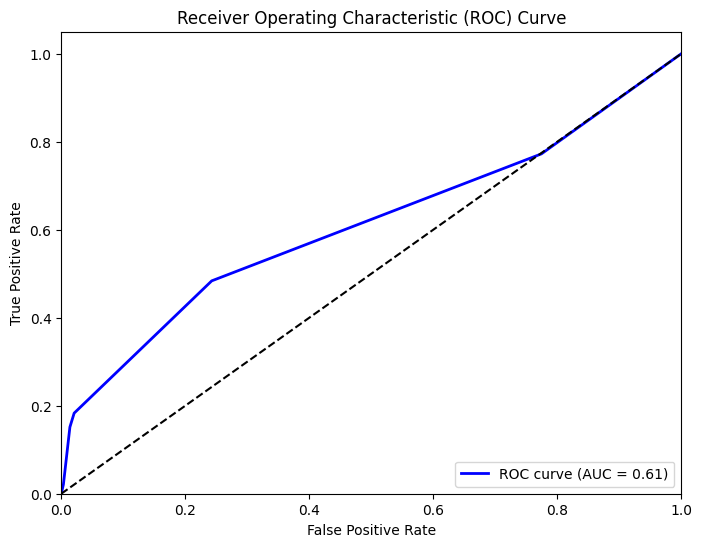

In [ ]:
y_pred_proba_knn = knn_cf.predict_proba(X_test_prep_filtered_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_knn = tpr - fpr
best_threshold_idx = np.argmax(youndex_knn)
best_threshold_knn = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_knn}")
y_pred_best_threshold_knn_filtered_2 = (y_pred_proba_knn >= best_threshold_knn).astype(int)

The best threshold is 0.4


In [ ]:
Classification_report_knn_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_knn_filtered_2)

print(f"Classification Report:  \n {Classification_report_knn_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      4673
           1       0.36      0.48      0.41      1327

    accuracy                           0.70      6000
   macro avg       0.60      0.62      0.60      6000
weighted avg       0.73      0.70      0.71      6000



In [ ]:
Balanced_accuracy_knn_filtered_2_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_knn_filtered_2)

print(f"Balanced Accuracy: {Balanced_accuracy_knn_filtered_2_best_threshold:.4f}")

Balanced Accuracy: 0.6206


**KNN Summary of results**

The results of the KNN with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.81
* Balance Accuracy: 0.58

The results of the KNN with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.70
* Balance Accuracy: 0.62

### Random Forest with Feature Selection with Logistic Regression

In [ ]:
rf_filtered2 = RandomForestClassifier(random_state=327)
rf_filtered2.fit(X_train_prep_filtered_2, y_train_prep)

print(f'The accuracy of random forrest is {rf_filtered2.score(X_test_prep_filtered_2, y_test_prep):.4f}.')

The accuracy of random forrest is 0.8188.


In [ ]:
y_pred_rf = rf_filtered2.predict(X_test_prep_filtered_2)
Classification_report_knn = classification_report(y_test_prep, y_pred_rf)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_rf = balanced_accuracy_score(y_test_prep, y_pred_rf)

print(f"Balanced Accuracy: {Balanced_accuracy_rf:.4f}")

Balanced Accuracy: 0.6573


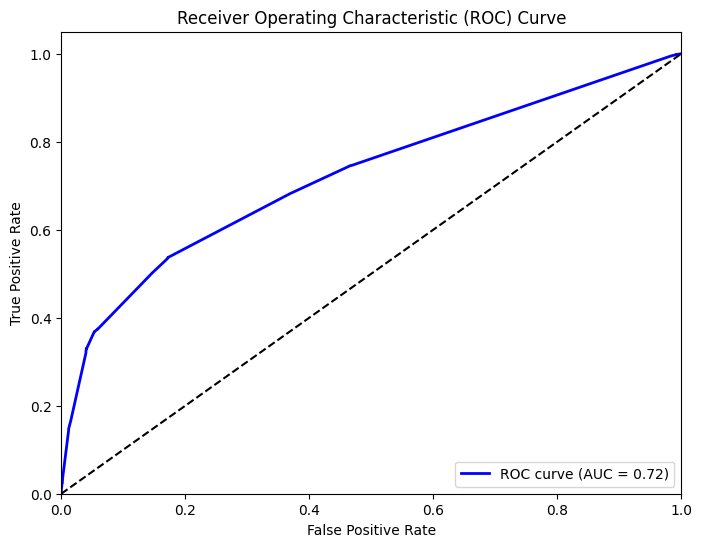

In [ ]:
y_pred_proba_random_forest_filtered_2 = rf_filtered2.predict_proba(X_test_prep_filtered_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_random_forest_filtered_2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
youndex_rf = tpr - fpr
best_threshold_idx = np.argmax(youndex_rf)
best_threshold_rf = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_rf}")
y_pred_best_threshold_rf_filtered_2 = (y_pred_proba_random_forest_filtered_2 >= best_threshold_rf).astype(int)

The best threshold is 0.22367076791296128


In [ ]:
classification_report_random_forest_best_threshold_2 = classification_report(y_test_prep, y_pred_best_threshold_rf_filtered_2)
print(f"Classification Report: \n{classification_report_random_forest_best_threshold_2}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.47      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



In [ ]:
Balanced_accuracy_random_forest_filtered_2_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_rf_filtered_2)

print(f"Balanced Accuracy: {Balanced_accuracy_random_forest_filtered_2_best_threshold:.4f}")

Balanced Accuracy: 0.6824


**RF Summary of results**

The results of the RF with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.86
* Balance Accuracy: 0.66

The results of the RF with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.68


### XGBoost with Feature Selection with Logistic Regression


In [ ]:
X_train_prep_filtered_training, X_train_prep_filtered_validation, y_train_prep_filtered_training, y_train_prep_filtered_validation = train_test_split(X_train_prep_filtered_2, y_train_prep, test_size = 0.2, random_state=327)

bst = XGBClassifier(n_estimators=100,
                    max_leaves=16,
                    learning_rate=0.1,
                    eval_metric='error',
                    early_stopping_rounds=10,
                    objective='binary:logistic')
bst.fit(X_train_prep_filtered_training, y_train_prep_filtered_training, eval_set=[(X_train_prep_filtered_validation, y_train_prep_filtered_validation)], verbose=False)

print(f'The accuracy of XGBoost is {bst.score(X_test_prep_filtered_2, y_test_prep):.4f}.')
print(f'The model converges at {bst.best_iteration}.')

The accuracy of XGBoost is 0.8185.
The model converges at 13.


In [ ]:
y_pred_xg = bst.predict(X_test_prep_filtered_2)
Classification_report_xg = classification_report(y_test_prep, y_pred_xg)

print(f"Classification Report:  \n {Classification_report_xg}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
Balanced_accuracy_xg = balanced_accuracy_score(y_test_prep, y_pred_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg:.4f}")

Balanced Accuracy: 0.6401


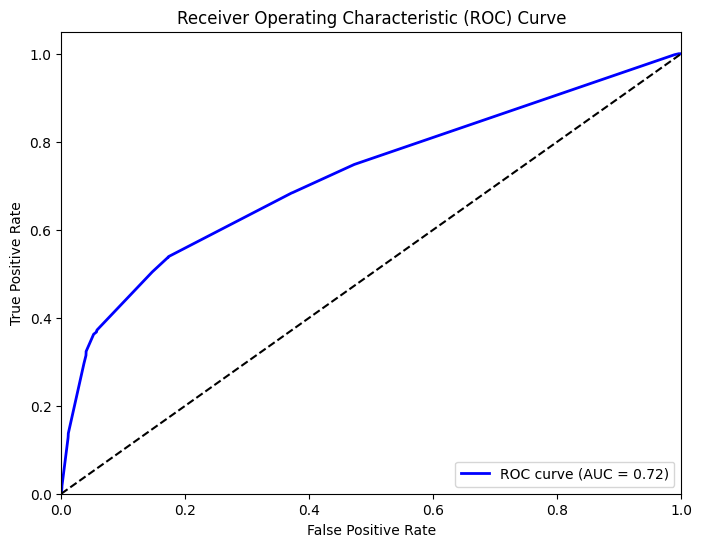

In [ ]:
y_pred_proba_xg = bst.predict_proba(X_test_prep_filtered_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_xg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_xg = tpr - fpr
best_threshold_idx = np.argmax(youndex_xg)
best_threshold_xg = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_xg}")
y_pred_best_threshold_xg = (y_pred_proba_xg >= best_threshold_xg).astype(int)

The best threshold is 0.19524484872817993


In [ ]:
Classification_report_xg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_xg)

print(f"Classification Report:  \n {Classification_report_xg_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.47      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



In [ ]:
Balanced_accuracy_xg_filtered_2_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg_filtered_2_best_threshold:.4f}")

Balanced Accuracy: 0.6830


**XGBoost Summary of results**

The results of the XGBoost with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.64

The results of the XGBoost with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.68

### Gaussian Naive Bayes with Feature Selection with Logistic Regression

In [ ]:
Bayes_cf = GaussianNB()

Bayes_cf.fit(X_train_prep_filtered_2, y_train_prep)

print(f'The accuracy of Gaussian Naive Bayes is {Bayes_cf.score(X_test_prep_filtered_2, y_test_prep):.4f}.')

The accuracy of Gaussian Naive Bayes is 0.8188.


In [ ]:
y_pred_bayes = Bayes_cf.predict(X_test_prep_filtered_2)

Classification_report_bayes = classification_report(y_test_prep, y_pred_bayes)

print(f"Classification Report:  \n {Classification_report_bayes}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_bayes = balanced_accuracy_score(y_test_prep, y_pred_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes:.4f}")

Balanced Accuracy: 0.6590


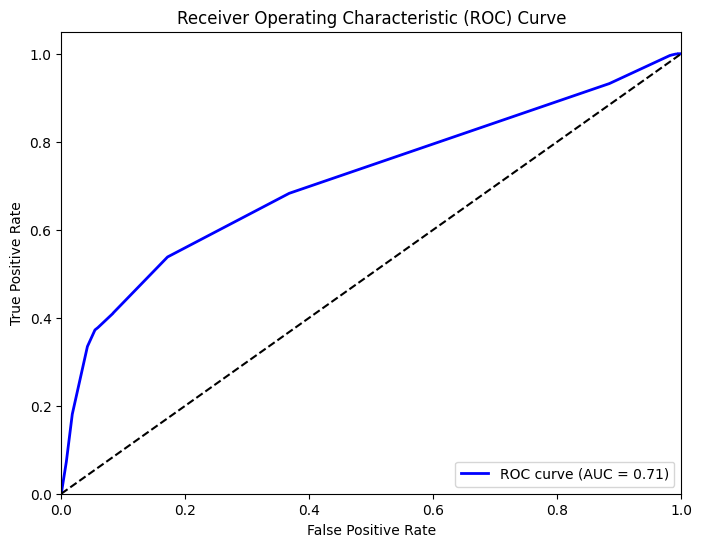

In [ ]:
y_pred_proba_bayes = Bayes_cf.predict_proba(X_test_prep_filtered_2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_bayes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_bayes = tpr - fpr
best_threshold_idx = np.argmax(youndex_bayes)
best_threshold_bayes = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_bayes}")
y_pred_best_threshold_bayes = (y_pred_proba_bayes >= best_threshold_bayes).astype(int)

The best threshold is 0.0006782599276659468


In [ ]:
Classification_report_bayes_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_bayes)

print(f"Classification Report:  \n {Classification_report_bayes_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      4673
           1       0.47      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



In [ ]:
Balanced_accuracy_bayes_filtered_2_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes_filtered_2_best_threshold:.4f}")

Balanced Accuracy: 0.6833


**GNB Summary of results**

The results of the GNB with the feature selection and default hyperparameter values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.66

The results of the GNB with the feature selection, the default hyperparameter values and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.68

## Hyperparameter Tuning

We'll conduct hyperparameter tuning on the filtered models, utilizing the columns obtained from RFE for Random Forest. This adjustment should enhance the model's performance, leading us towards achieving the best result.

###Hyperparameter Tuning For Logistic Regression


Regarding the hyperparameters of this method, we should considerer the followings as the most common used:

The regularization parameter C controls the strength of regularization. Smaller values of C result in stronger regularization, which can help prevent overfitting by penalizing large coefficients.

The penalty hyperparameter determines the type of regularization applied. It can take values like 'l1' (L1 regularization), 'l2' (L2 regularization), or 'elasticnet' (a combination of L1 and L2 regularization).

The solver hyperparameter specifies the optimization algorithm used to find the weights that minimize the cost function.

max_iter determines the maximum number of iterations for the optimization algorithm to converge.

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}


logreg_filtered = LogisticRegression(max_iter=2800, random_state=327)

halving_grid_search = HalvingGridSearchCV(logreg_filtered,
                                   param_grid, cv=3,
                                   min_resources='exhaust',
                                   scoring='balanced_accuracy',
                                   random_state = 327,
                                   n_jobs=-1)
halving_grid_search.fit(X_train_prep_filtered, y_train_prep)

print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


,iter,n_resources,param_C,param_penalty,param_solver,mean_test_score
16,2,23994,100,l1,saga,0.655128
17,2,23994,100,l2,saga,0.655128
13,1,7998,100,l1,saga,0.647938
14,1,7998,100,l2,saga,0.647938
15,1,7998,1,l1,saga,0.647912
12,1,7998,1,l2,saga,0.647464
6,0,2666,1,l1,saga,0.642822
10,0,2666,100,l1,saga,0.640669
11,0,2666,100,l2,saga,0.640669
7,0,2666,1,l2,saga,0.640029


In [ ]:
best_params_lr = halving_grid_search.best_params_

the hyperparameter tuning process identified the optimal logistic regression configuration as having a regularization strength (C) of 100, utilizing l1 penalty, and the saga solver.

#### Logistic Regression with Feature Selection and Hyperparameter Tuning


In [ ]:
logreg_best = LogisticRegression(max_iter=2800, random_state=327, **best_params_lr)
logreg_best.fit(X_train_prep_filtered, y_train_prep)

# Evaluate the model on the test set
accuracy = logreg_best.score(X_test_prep_filtered, y_test_prep)
print(f'The accuracy of logistic regression is {accuracy:.4f}.')

The accuracy of logistic regression is 0.8172.


In [ ]:
y_pred_lr = logreg_best.predict(X_test_prep_filtered)
Classification_report_lr = classification_report(y_test_prep, y_pred_lr)

print(f"Classification Report:  \n {Classification_report_lr}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_lr = balanced_accuracy_score(y_test_prep, y_pred_lr)

print(f"Balanced Accuracy: {Balanced_accuracy_lr:.4f}")

Balanced Accuracy: 0.6517


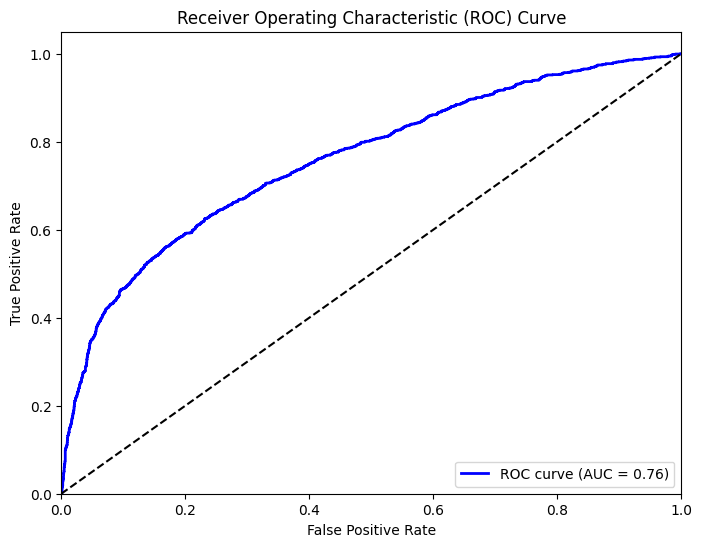

In [ ]:
y_pred_proba_logreg_best = logreg_best.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_logreg_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_lr = tpr - fpr
best_threshold_idx = np.argmax(youndex_lr)
best_threshold_lr = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_lr}")
y_pred_best_threshold_lr_best = (y_pred_proba_logreg_filtered >= best_threshold_lr).astype(int)

The best threshold is 0.18625738962488994


In [ ]:
classification_report_logreg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_lr_best)
print(f"Classification Report: \n{classification_report_logreg_best_threshold}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4673
           1       0.43      0.63      0.51      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.75      6000



In [ ]:
Balanced_accuracy_logreg_best_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_lr_best)

print(f"Balanced Accuracy: {Balanced_accuracy_logreg_best_best_threshold:.4f}")

Balanced Accuracy: 0.6971


**LR Summary of results**

The results of the LR with the feature selection and hyperparameter tuning values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.65

The results of the LR with the feature selection, hyperparameter tuning and with the best threshold are the following:
* Accuracy: 0.74
* Balance Accuracy: 0.70

### Hyperparameter Tuning for K-Nearest Neighbors

Regarding the hyperparameters of this method, we should considerer the followings as the most common used:



*   **n_neighbors:**is the number of neighbors to use by default for kneighbors queries
*   **Weights:**is the function used in prediction, could have 2 different types
  * Uniform: All points in each neighborhood are weighted equally
  * Distance: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away

*   **P:** is associated with the choice of distance metric
  * When p = 1, this is equivalent to using manhattan_distance
  * When p=2 this is equivalent to using euclidean_distance


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'p': [1, 2]
}

knn_cf = KNeighborsClassifier()

halving_grid_search = HalvingGridSearchCV(knn_cf,
                                          param_grid, cv=3,
                                          min_resources='exhaust',
                                          scoring='balanced_accuracy',
                                          random_state = 327,
                                          n_jobs=-1)
halving_grid_search.fit(X_train_prep_filtered, y_train_prep)

print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex='(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'n_neighbors': 7, 'p': 1}


,iter,n_resources,param_n_neighbors,param_p,mean_test_score
7,1,24000,7,1,0.632642
6,1,24000,5,1,0.629080
4,0,8000,7,1,0.620842
2,0,8000,5,1,0.617435
5,0,8000,7,2,0.615827
0,0,8000,3,1,0.615336
1,0,8000,3,2,0.615186
3,0,8000,5,2,0.612907


In [ ]:
best_params_knn = halving_grid_search.best_params_

These parameters signify that the KNN classifier performs most effectively when considering the nearest 7 neighbors in the feature space and employing the Manhattan distance metric (L1 norm) for proximity measurement

#### K-Nearest Neighbors with Feature Selection and Hyperparameter Tuning


In [ ]:
knn_cf = KNeighborsClassifier(**best_params_knn)

knn_cf.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of KNN is {knn_cf.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of KNN is 0.8045.


In [ ]:
y_pred_knn = knn_cf.predict(X_test_prep_filtered)
Classification_report_knn = classification_report(y_test_prep, y_pred_knn)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.60      0.35      0.44      1327

    accuracy                           0.80      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



In [ ]:
Balanced_accuracy_knn = balanced_accuracy_score(y_test_prep, y_pred_knn)

print(f"Balanced Accuracy: {Balanced_accuracy_knn:.4f}")

Balanced Accuracy: 0.6414


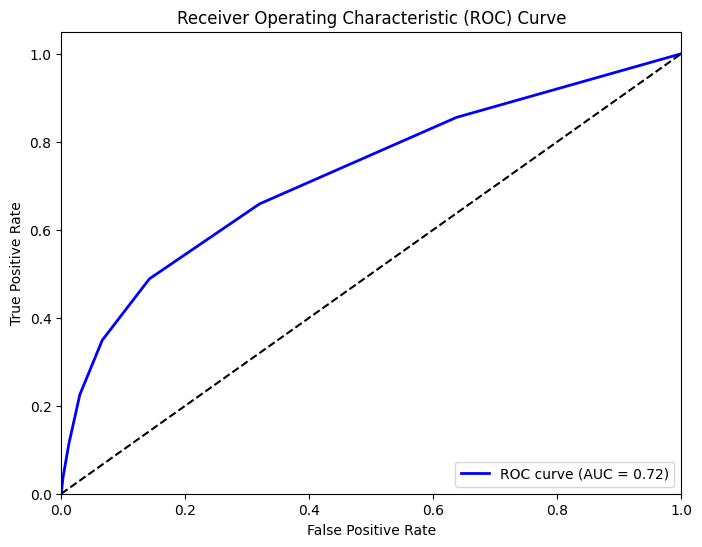

In [ ]:
y_pred_proba_knn = knn_cf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_knn = tpr - fpr
best_threshold_idx = np.argmax(youndex_knn)
best_threshold_knn = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_knn}")
y_pred_best_threshold_knn_best = (y_pred_proba_knn >= best_threshold_knn).astype(int)

The best threshold is 0.42857142857142855


In [ ]:
Classification_report_knn_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_knn_best)

print(f"Classification Report:  \n {Classification_report_knn_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.49      0.49      0.49      1327

    accuracy                           0.78      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.78      0.78      0.78      6000



In [ ]:
Balanced_accuracy_knn_best_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_knn_best)

print(f"Balanced Accuracy: {Balanced_accuracy_knn_best_best_threshold:.4f}")

Balanced Accuracy: 0.6731


**KNN Summary of results**

The results of the KNN with the feature selection and hyperparameter tuning values are the following:
*	Accuracy: 0.80
* Balance Accuracy: 0.64

The results of the KNN with the feature selection, hyperparameter tuning and with the best threshold are the following:
* Accuracy: 0.78
* Balance Accuracy: 0.67

### Hyperparameter Tuning for Random Forest

Max_depth controls tree depth, affecting model complexity and overfitting, while min_samples_leaf prevents overfitting by setting a minimum sample size for node splitting. Values of 10, 20, 30, 40, and 50 for max_depth balance intricacy and overfitting risk, while min_samples_leaf values like 5, 10, 15, 20, and 25 impact generalization. Employing grid search, the model systematically tests these combinations to maximize accuracy and optimize predictions on the dataset.

In [ ]:
param_grid = [
    {'max_depth': [10, 20, 30, 40, 50],
     'min_samples_leaf': [5, 10, 15, 20, 25]
    }
]

rf_filtered = RandomForestClassifier(random_state=327)

halving_grid_search = HalvingGridSearchCV(rf_filtered,
                           param_grid, cv=3,
                           scoring='balanced_accuracy',
                           min_resources='exhaust',
                           random_state = 327,
                           n_jobs=-1)
halving_grid_search.fit(X_train_prep_filtered, y_train_prep)

print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'max_depth': 20, 'min_samples_leaf': 5}


,iter,n_resources,param_max_depth,param_min_samples_leaf,mean_test_score
36,2,23994,20,5,0.656108
34,2,23994,40,5,0.655231
35,2,23994,50,5,0.655231
33,1,7998,20,5,0.640074
29,1,7998,30,5,0.639541
30,1,7998,40,5,0.639541
31,1,7998,50,5,0.639541
32,1,7998,10,5,0.636907
25,1,7998,40,10,0.635184
27,1,7998,50,10,0.635184


In [ ]:
best_params_rf = halving_grid_search.best_params_

Throughout the hyperparameter tuning process, the emphasis remained on max_depth and min_samples_leaf. Max_depth controls tree depth, affecting model complexity and overfitting, while min_samples_leaf prevents overfitting by setting a minimum sample size for node splitting.

The best hyperparameters for Max_depth is 40, and min_samples_leafs is 5 and it results in an improvement of balanced accuracy to 0.66



#### Random Forest with Feature Selection and Hyperparameter Tuning


In [ ]:
rf_best = RandomForestClassifier(random_state=327, **best_params_rf)

rf_best.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of random forrest is {rf_best.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of random forrest is 0.8180.


In [ ]:
y_pred_rf = rf_best.predict(X_test_prep_filtered)
Classification_report_knn = classification_report(y_test_prep, y_pred_rf)

print(f"Classification Report:  \n {Classification_report_knn}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_rf = balanced_accuracy_score(y_test_prep, y_pred_rf)

print(f"Balanced Accuracy: {Balanced_accuracy_rf:.4f}")

Balanced Accuracy: 0.6517


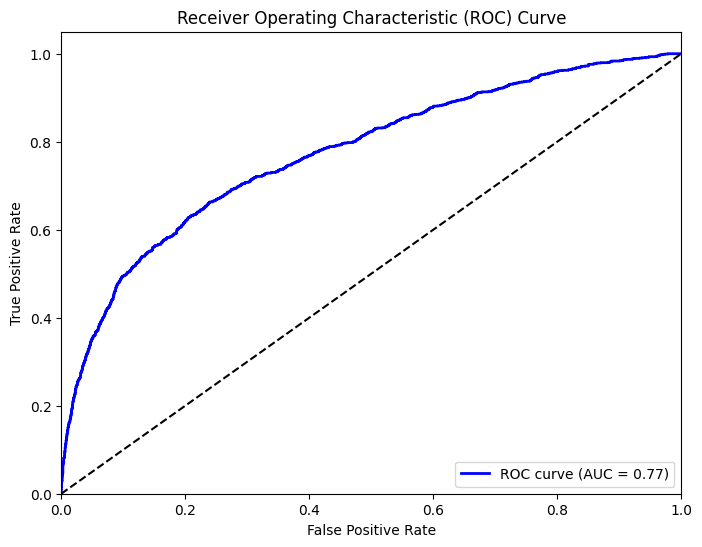

In [ ]:
y_pred_proba_random_forest_filtered = rf_best.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_random_forest_filtered)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_rf = tpr - fpr
best_threshold_idx = np.argmax(youndex_rf)
best_threshold_rf = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_rf}")
y_pred_best_threshold_rf_best = (y_pred_proba_random_forest_filtered >= best_threshold_rf).astype(int)

The best threshold is 0.21306490511832124


In [ ]:
classification_report_random_forest_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_rf_best)
print(f"Classification Report: \n{classification_report_random_forest_best_threshold}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4673
           1       0.44      0.66      0.53      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.71      0.67      6000
weighted avg       0.79      0.74      0.76      6000



In [ ]:
Balanced_accuracy_random_forest_best_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_rf_best)

print(f"Balanced Accuracy: {Balanced_accuracy_random_forest_best_best_threshold:.4f}")

Balanced Accuracy: 0.7119


**Random Forest Summary of results**

The results of the Random Forest with the feature selection and hyperparameter tuning values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.65

The results of the Random Forest with the feature selection, hyperparameter tuning and with the best threshold are the following:
* Accuracy: 0.74
* Balance Accuracy: 0.71

### Hyperparameter Tuning for XGBoost

In XGBoost, we selected three hyperparameters for tuning. max_depth influences tree depth, controlling model complexity and mitigating overfitting. Similarly, max_leaves serves to limit the number of terminal nodes in each tree, providing an alternative means to manage model complexity. The learning_rate parameter regulates the influence of each tree's prediction during training, impacting both the speed and quality of the learning process.

In [ ]:
X_train_prep_filtered_training, X_train_prep_filtered_validation, y_train_prep_filtered_training, y_train_prep_filtered_validation = train_test_split(X_train_prep_filtered, y_train_prep, test_size = 0.2, random_state=327)

param_grid = [
    {
      "max_depth": np.arange(10, 31, 10),
      "max_leaves" : np.arange(11, 47, 5),
      "learning_rate": (np.concatenate(([0.01], np.arange(0.1, 0.91, 0.10))))
    }
]

bst = XGBClassifier(n_estimators=100,
                    eval_metric='error',
                    early_stopping_rounds=10,
                    objective='binary:logistic')

halving_grid_search = HalvingGridSearchCV(bst,
                                          param_grid, cv=3,
                                          min_resources='exhaust',
                                          scoring='balanced_accuracy',
                                          random_state = 327,
                                          n_jobs=-1)
halving_grid_search.fit(X_train_prep_filtered, y_train_prep, eval_set=[(X_train_prep_filtered_validation, y_train_prep_filtered_validation)], verbose=False)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'learning_rate': 0.6, 'max_depth': 20, 'max_leaves': 16}


,iter,n_resources,param_learning_rate,param_max_depth,param_max_leaves,mean_test_score
356,4,23976,0.6,20,16,0.655376
357,4,23976,0.6,10,16,0.655376
358,4,23976,0.6,30,16,0.655376
347,3,7992,0.6,20,16,0.639187
348,3,7992,0.6,10,16,0.639187
349,3,7992,0.6,30,16,0.639187
353,3,7992,0.7,20,46,0.632151
354,3,7992,0.7,30,46,0.632151
350,3,7992,0.4,20,16,0.631135
351,3,7992,0.4,10,16,0.631135


In [ ]:
best_params_xg = halving_grid_search.best_params_

The most effective hyperparameter configuration discovered for this XGBoost model was a max_depth of 40 and a min_samples_leaf of 5, resulting in a notable enhancement of the balanced accuracy metric, which rose to 0.66.

#### XGBoost with Feature Selection and Hyperparameter Tuning

In [ ]:
bst_best = XGBClassifier(n_estimators=100,
                    eval_metric='error',
                    early_stopping_rounds=10,
                    objective='binary:logistic',
                    **best_params_xg)
bst_best.fit(X_train_prep_filtered_training, y_train_prep_filtered_training, eval_set=[(X_train_prep_filtered_validation, y_train_prep_filtered_validation)], verbose=False)

print(f'The accuracy of XGBoost is {bst_best.score(X_test_prep_filtered, y_test_prep):.4f}.')
print(f'The model converges at {bst_best.best_iteration}.')

The accuracy of XGBoost is 0.8165.
The model converges at 1.


In [ ]:
y_pred_xg = bst_best.predict(X_test_prep_filtered)
Classification_report_xg = classification_report(y_test_prep, y_pred_xg)

print(f"Classification Report:  \n {Classification_report_xg}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
Balanced_accuracy_xg = balanced_accuracy_score(y_test_prep, y_pred_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg:.4f}")

Balanced Accuracy: 0.6415


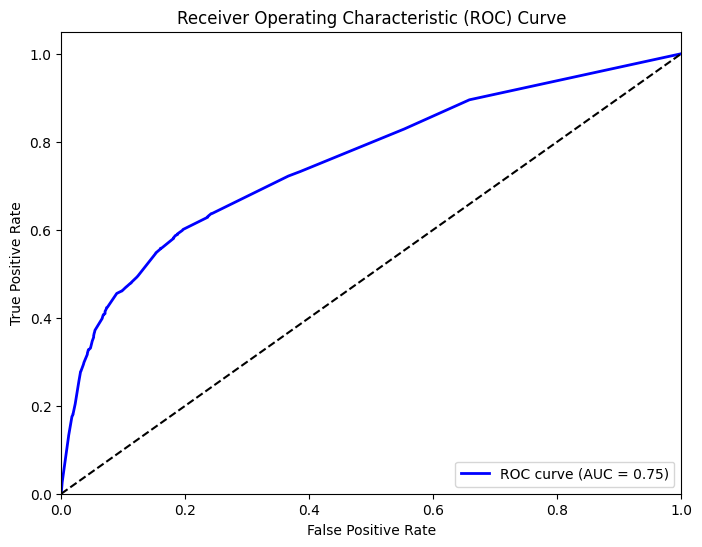

In [ ]:
y_pred_proba_xg = bst_best.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_xg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_xg = tpr - fpr
best_threshold_idx = np.argmax(youndex_xg)
best_threshold_xg = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_xg}")
y_pred_best_threshold_xg = (y_pred_proba_xg >= best_threshold_xg).astype(int)

The best threshold is 0.216147780418396


In [ ]:
Classification_report_xg_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_xg)

print(f"Classification Report:  \n {Classification_report_xg_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.46      0.60      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
Balanced_accuracy_xg_best_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_xg)

print(f"Balanced Accuracy: {Balanced_accuracy_xg_best_best_threshold:.4f}")

Balanced Accuracy: 0.7021


**XGBoost Summary of results**

The results of the XGBoost with the feature selection and hyperparameter tuning values are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.64

The results of the XGBoost with the feature selection, hyperparameter tuning and with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.70

### Hyperparameter Tuning for Gaussian Naive Bayes

In Gaussian Naive Bayes, 'priors' and 'var_smoothing' are the key hyperparameters for tuning. 'Priors' set class probabilities, offering options like None for no prior, [0.5, 0.5] for equal, or [0.3, 0.7] for unequal distribution exploration. Meanwhile, 'var_smoothing' uses Laplace smoothing on feature variances, tested via np.logspace(0, -9, num=10) for values from 1 to 10^-9, impacting feature influence on classification. This hyperparameter grid optimizes the model for better predictions on the dataset.

In [ ]:
param_grid = {
    'priors': [None, [0.5, 0.5], [0.3, 0.7]],
    'var_smoothing': np.logspace(0,-9, num=10)
}

Bayes_cf = GaussianNB()

halving_grid_search = HalvingGridSearchCV(Bayes_cf,
                                          param_grid, cv=3,
                                          min_resources='exhaust',
                                          scoring='balanced_accuracy',
                                          random_state = 327,
                                          n_jobs=-1)
halving_grid_search.fit(X_train_prep_filtered, y_train_prep)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'priors': [0.3, 0.7], 'var_smoothing': 0.001}


,iter,n_resources,param_priors,param_var_smoothing,mean_test_score
45,3,23976,"[0.3, 0.7]",0.001,0.696995
44,3,23976,None,0.01,0.695913
41,2,7992,"[0.3, 0.7]",0.001,0.696203
42,2,7992,None,0.01,0.695103
43,2,7992,"[0.5, 0.5]",0.00001,0.694670
40,2,7992,"[0.3, 0.7]",0.0001,0.694482
30,1,2664,"[0.5, 0.5]",0.00001,0.700324
36,1,2664,None,0.01,0.699322
31,1,2664,"[0.3, 0.7]",0.001,0.696790
32,1,2664,"[0.3, 0.7]",0.0001,0.696673


In [ ]:
best_params_bayes = halving_grid_search.best_params_

This result indicates that the Gaussian Naive Bayes classifier, is  suited for the given task when using class priors of 0.3 and 0.7 for the two classes, respectively, and applying a variance smoothing factor of 0.001.

#### Gaussian Naive Bayes with Feature Selection and Hyperparameter Tuning

In [ ]:
Bayes_best = GaussianNB(**best_params_bayes)

Bayes_best.fit(X_train_prep_filtered, y_train_prep)

print(f'The accuracy of Gaussian Naive Bayes is {Bayes_best.score(X_test_prep_filtered, y_test_prep):.4f}.')

The accuracy of Gaussian Naive Bayes is 0.7603.


In [ ]:
y_pred_bayes = Bayes_best.predict(X_test_prep_filtered)
Classification_report_bayes = classification_report(y_test_prep, y_pred_bayes)

print(f"Classification Report:  \n {Classification_report_bayes}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      4673
           1       0.46      0.54      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.76      0.77      6000



In [ ]:
Balanced_accuracy_bayes = balanced_accuracy_score(y_test_prep, y_pred_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes:.4f}")

Balanced Accuracy: 0.6802


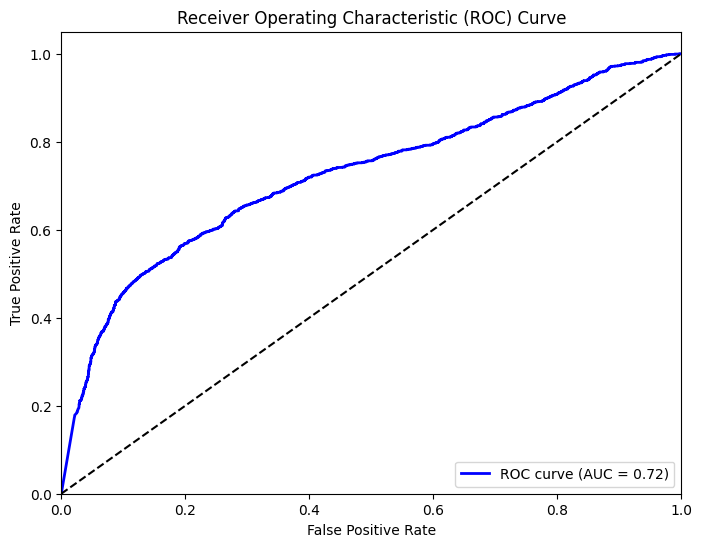

In [ ]:
y_pred_proba_bayes = Bayes_best.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_bayes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_bayes = tpr - fpr
best_threshold_idx = np.argmax(youndex_bayes)
best_threshold_bayes = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_bayes}")
y_pred_best_threshold_bayes = (y_pred_proba_bayes >= best_threshold_bayes).astype(int)

The best threshold is 0.1078131834651263


In [ ]:
Classification_report_bayes_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_bayes)

print(f"Classification Report:  \n {Classification_report_bayes_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.45      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



In [ ]:
Balanced_accuracy_bayes_best_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_bayes)

print(f"Balanced Accuracy: {Balanced_accuracy_bayes_best_best_threshold:.4f}")

Balanced Accuracy: 0.6852


**Gaussian Naive Bayes Summary of results**

The results of the Gaussian Naive Bayes with the feature selection and hyperparameter tuning values are the following:
*	Accuracy: 0.76
* Balance Accuracy: 0.68

The results of the Gaussian Naive Bayes with the feature selection, hyperparameter tuning and with the best threshold are the following:
* Accuracy: 0.75
* Balance Accuracy: 0.69

##Stacking

Stacking is an ensemble learning technique that combines multiple base models to create a meta-model, which learns how to best combine the predictions of the base models. It involves training several different models and using their predictions as input features to a final model (meta-learner) that makes the ultimate prediction.

### Stacking Classifier with all Models

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=100, random_state=327, n_jobs=-1, **best_params_lr)),
        ('knn', KNeighborsClassifier(n_jobs=-1, **best_params_knn)),
        ('rf', RandomForestClassifier(random_state=327, n_jobs=-1, **best_params_rf)),
        ('xg', XGBClassifier(n_estimators=15,
                             eval_metric='error',
                             objective='binary:logistic',
                             n_jobs=-1,
                             **best_params_xg)),
        ('gnb', GaussianNB(**best_params_bayes))
    ],
    final_estimator=RandomForestClassifier(random_state=327, n_jobs=-1),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_prep_filtered, y_train_prep)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=100, n_jobs=-1,
                                                   penalty='l1',
                                                   random_state=327,
                                                   solver='saga')),
                               ('knn',
                                KNeighborsClassifier(n_jobs=-1, n_neighbors=7,
                                                     p=1)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=5,
                                                       n_jobs=-1,
                                                       random_state=327)),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylev...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=20,
                                              max_leaves=16,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=15, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gnb',
                                GaussianNB(priors=[0.3, 0.7],
                                           var_smoothing=0.001))],
                   final_estimator=RandomForestClassifier(n_jobs=-1,
                                                          random_state=327),
                   n_jobs=-1)

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(X_test_prep_filtered, y_test_prep):.4f}')

Stacking the three has accuracy of 0.8113


In [ ]:
y_pred_stacking = stacking_clf.predict(X_test_prep_filtered)
Classification_report_stacking = classification_report(y_test_prep, y_pred_stacking)

print(f"Classification Report:  \n {Classification_report_stacking}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
Balanced_accuracy_stacking = balanced_accuracy_score(y_test_prep, y_pred_stacking)

print(f"Balanced Accuracy: {Balanced_accuracy_stacking:.4f}")

Balanced Accuracy: 0.6520


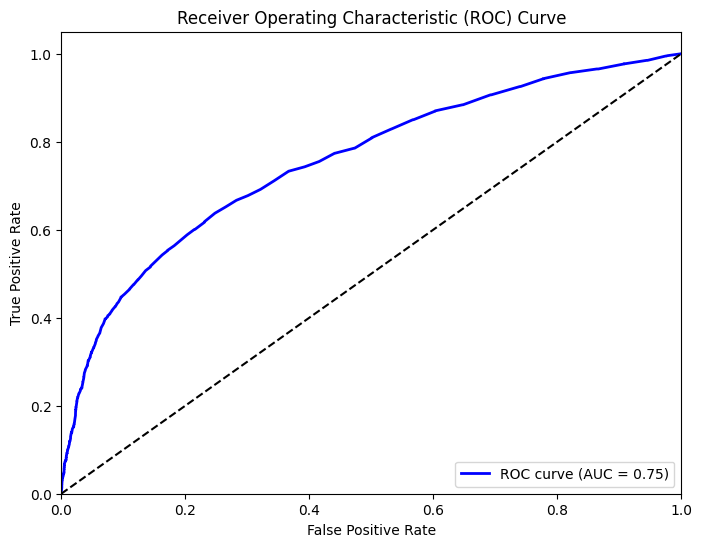

In [ ]:
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_stacking)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_stacking = tpr - fpr
best_threshold_idx = np.argmax(youndex_stacking)
best_threshold_stacking = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_stacking}")
y_pred_best_threshold_stacking = (y_pred_proba_stacking >= best_threshold_stacking).astype(int)

The best threshold is 0.24


In [ ]:
Classification_report_stacking_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_stacking)

print(f"Classification Report:  \n {Classification_report_stacking_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      4673
           1       0.42      0.64      0.51      1327

    accuracy                           0.73      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.78      0.73      0.74      6000



In [ ]:
Balanced_accuracy_stacking_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_stacking)

print(f"Balanced Accuracy: {Balanced_accuracy_stacking_best_threshold:.4f}")

Balanced Accuracy: 0.6950


**Stacking Classifier Summary of results**

The results of the Stacking Classifier are the following:
*	Accuracy: 0.81
* Balance Accuracy: 0.65

The results of the Stacking Classifier with the best threshold are the following:
* Accuracy: 0.73
* Balance Accuracy: 0.69

### Stacking Classifier with only top 3 models

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=100, random_state=327, n_jobs=-1, **best_params_lr)),
        ('rf', RandomForestClassifier(random_state=327, n_jobs=-1, **best_params_rf)),
        ('xg', XGBClassifier(n_estimators=15,
                             eval_metric='error',
                             objective='binary:logistic',
                             n_jobs=-1,
                             **best_params_xg)),
    ],
    final_estimator=RandomForestClassifier(random_state=327, n_jobs=-1),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_prep_filtered, y_train_prep)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=100, n_jobs=-1,
                                                   penalty='l1',
                                                   random_state=327,
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=5,
                                                       n_jobs=-1,
                                                       random_state=327)),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device...
                                              learning_rate=0.6, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=20,
                                              max_leaves=16,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=15, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=RandomForestClassifier(n_jobs=-1,
                                                          random_state=327),
                   n_jobs=-1)

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(X_test_prep_filtered, y_test_prep):.4f}')

Stacking the three has accuracy of 0.8097


In [ ]:
y_pred_stacking = stacking_clf.predict(X_test_prep_filtered)
Classification_report_stacking = classification_report(y_test_prep, y_pred_stacking)

print(f"Classification Report:  \n {Classification_report_stacking}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.62      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
Balanced_accuracy_stacking = balanced_accuracy_score(y_test_prep, y_pred_stacking)

print(f"Balanced Accuracy: {Balanced_accuracy_stacking:.4f}")

Balanced Accuracy: 0.6525


In [ ]:
scorer = make_scorer(balanced_accuracy_score)
Average_balanced_accuracy_stacking = cross_val_score(stacking_clf, X_train_prep_filtered, y_train_prep, cv=3, scoring= scorer, n_jobs = -1)
print(f"Average Balanced Accuracy: {Average_balanced_accuracy_stacking.mean():.4f}")

Average Balanced Accuracy: 0.6488


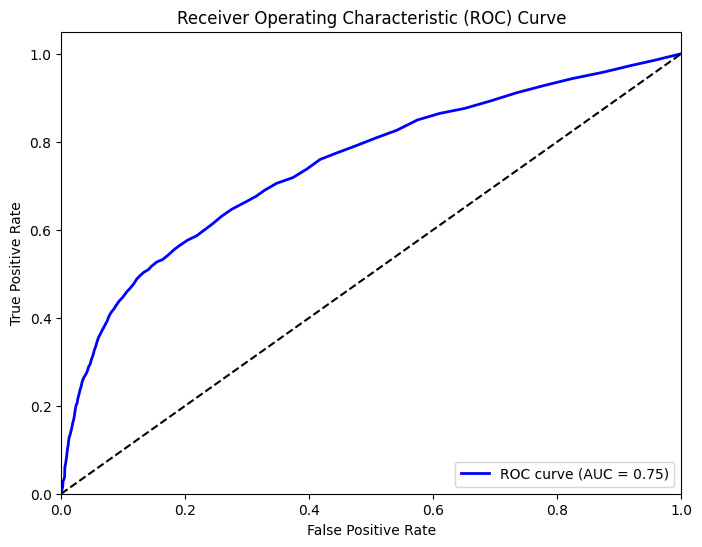

In [ ]:
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_stacking)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_stacking = tpr - fpr
best_threshold_idx = np.argmax(youndex_stacking)
best_threshold_stacking = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_stacking}")
y_pred_best_threshold_stacking = (y_pred_proba_stacking >= best_threshold_stacking).astype(int)

The best threshold is 0.28


In [ ]:
Classification_report_stacking_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_stacking)

print(f"Classification Report:  \n {Classification_report_stacking_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.46      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



In [ ]:
Balanced_accuracy_stacking_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_stacking)

print(f"Balanced Accuracy: {Balanced_accuracy_stacking_best_threshold:.4f}")

Balanced Accuracy: 0.6867


**Stacking Classifier With Best Models Summary of results**

The results of the Stacking Classifier With Best Models are the following:
*	Accuracy: 0.81
* Balance Accuracy: 0.65

The results of the Stacking Classifier With Best Models with the best threshold are the following:
* Accuracy: 0.75
* Balance Accuracy: 0.69

## Voting Classifier

A Voting Classifier is an ensemble learning technique in machine learning where multiple individual models are trained and their predictions are combined to make a final prediction. It is a form of model averaging that aggregates the predictions of multiple base models to achieve better overall performance than any individual model.

### Voting Classifier with all Models

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=100, random_state=327, n_jobs=-1, **best_params_lr)),
        ('knn', KNeighborsClassifier(n_jobs=-1, **best_params_knn)),
        ('rf', RandomForestClassifier(random_state=327, n_jobs=-1, **best_params_rf)),
        ('xg', XGBClassifier(n_estimators=15,
                             eval_metric='error',
                             objective='binary:logistic',
                             n_jobs=-1,
                             **best_params_xg)),
        ('gnb', GaussianNB(**best_params_bayes))
    ],
    voting='soft',
    n_jobs=-1
)


voting_clf.fit(X_train_prep_filtered, y_train_prep)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, n_jobs=-1, penalty='l1',
                                                 random_state=327,
                                                 solver='saga')),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=7,
                                                   p=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=5,
                                                     n_jobs=-1,
                                                     random_state=327)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None...
                                            learning_rate=0.6, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=16,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=15, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gnb',
                              GaussianNB(priors=[0.3, 0.7],
                                         var_smoothing=0.001))],
                 n_jobs=-1, voting='soft')

In [ ]:
print(f'Stacking the three has accuracy of {voting_clf.score(X_test_prep_filtered, y_test_prep):.4f}')

Stacking the three has accuracy of 0.8152


In [ ]:
y_pred_voting = voting_clf.predict(X_test_prep_filtered)
Classification_report_voting = classification_report(y_test_prep, y_pred_voting)

print(f"Classification Report:  \n {Classification_report_voting}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      4673
           1       0.62      0.43      0.51      1327

    accuracy                           0.82      6000
   macro avg       0.73      0.68      0.70      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_voting = balanced_accuracy_score(y_test_prep, y_pred_voting)

print(f"Balanced Accuracy: {Balanced_accuracy_voting:.4f}")

Balanced Accuracy: 0.6779


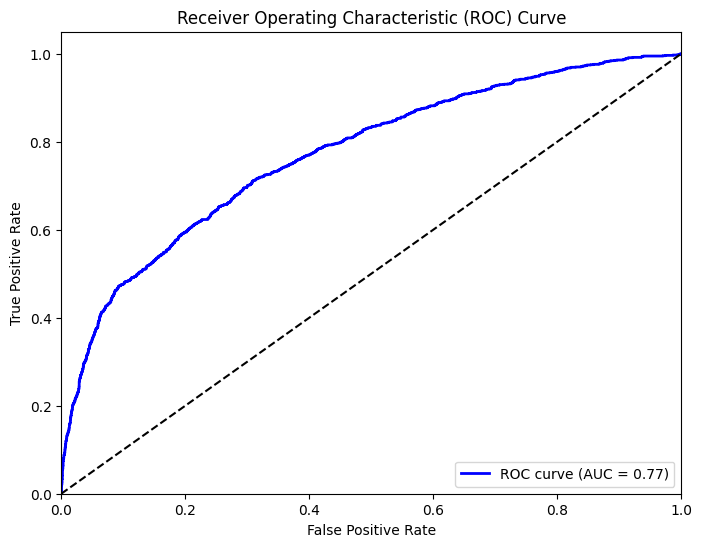

In [ ]:
y_pred_proba_voting = voting_clf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_voting = tpr - fpr
best_threshold_idx = np.argmax(youndex_voting)
best_threshold_voting = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_voting}")
y_pred_best_threshold_voting = (y_pred_proba_voting >= best_threshold_voting).astype(int)

The best threshold is 0.15780672398501522


In [ ]:
Classification_report_voting_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_voting)

print(f"Classification Report:  \n {Classification_report_voting_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      4673
           1       0.40      0.71      0.51      1327

    accuracy                           0.70      6000
   macro avg       0.64      0.70      0.64      6000
weighted avg       0.78      0.70      0.72      6000



In [ ]:
Balanced_accuracy_voting_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_voting)

print(f"Balanced Accuracy: {Balanced_accuracy_voting_best_threshold:.4f}")

Balanced Accuracy: 0.7011


**Voting Classifier Summary of results**

The results of the Voting Classifier are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.68

The results of the Voting Classifier with the best threshold are the following:
* Accuracy: 0.70
* Balance Accuracy: 0.70

### Voting Classifier with only top 3 models

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=100, random_state=327, n_jobs=-1, **best_params_lr)),
        ('rf', RandomForestClassifier(random_state=327, n_jobs=-1, **best_params_rf)),
        ('xg', XGBClassifier(n_estimators=15,
                             eval_metric='error',
                             objective='binary:logistic',
                             n_jobs=-1,
                             **best_params_xg)),
    ],
    voting='soft',
    n_jobs=-1
)


voting_clf.fit(X_train_prep_filtered, y_train_prep)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, n_jobs=-1, penalty='l1',
                                                 random_state=327,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=5,
                                                     n_jobs=-1,
                                                     random_state=327)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            e...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.6, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=16,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=15, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [ ]:
print(f'Stacking the three has accuracy of {voting_clf.score(X_test_prep_filtered, y_test_prep):.4f}')

Stacking the three has accuracy of 0.8190


In [ ]:
y_pred_voting = voting_clf.predict(X_test_prep_filtered)
Classification_report_voting = classification_report(y_test_prep, y_pred_voting)

print(f"Classification Report:  \n {Classification_report_voting}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
Balanced_accuracy_voting = balanced_accuracy_score(y_test_prep, y_pred_voting)

print(f"Balanced Accuracy: {Balanced_accuracy_voting:.4f}")

Balanced Accuracy: 0.6545


In [ ]:
Average_balanced_accuracy_voting = cross_val_score(voting_clf, X_train_prep_filtered, y_train_prep, cv=3, scoring= scorer, n_jobs = -1)
print(f"Average Balanced Accuracy: {Average_balanced_accuracy_voting.mean():.4f}")

Average Balanced Accuracy: 0.6548


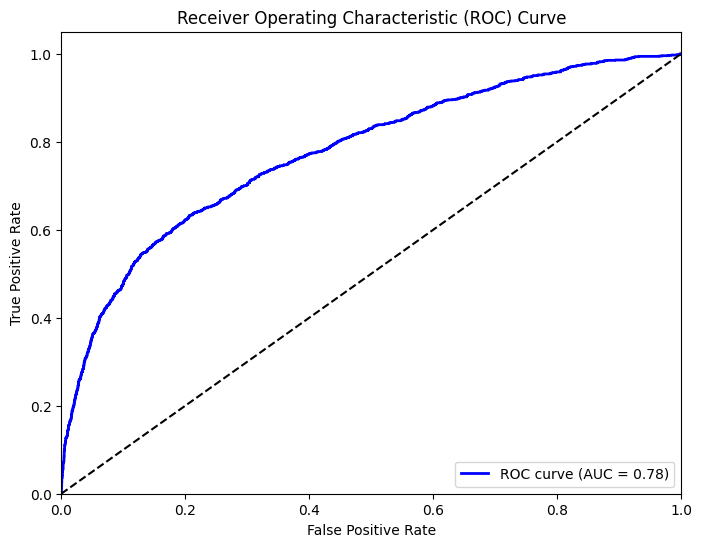

In [ ]:
y_pred_proba_voting = voting_clf.predict_proba(X_test_prep_filtered)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youndex_voting = tpr - fpr
best_threshold_idx = np.argmax(youndex_voting)
best_threshold_voting = thresholds[best_threshold_idx]
print(f"The best threshold is {best_threshold_voting}")
y_pred_best_threshold_voting = (y_pred_proba_voting >= best_threshold_voting).astype(int)

The best threshold is 0.2137877199225108


In [ ]:
Classification_report_voting_best_threshold = classification_report(y_test_prep, y_pred_best_threshold_voting)

print(f"Classification Report:  \n {Classification_report_voting_best_threshold}")

Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.79      0.84      4673
           1       0.47      0.63      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
Balanced_accuracy_voting_best_threshold = balanced_accuracy_score(y_test_prep, y_pred_best_threshold_voting)

print(f"Balanced Accuracy: {Balanced_accuracy_voting_best_threshold:.4f}")

Balanced Accuracy: 0.7130


**Voting Classifier With Best Models Summary of results**

The results of the Voting Classifier With Best Models are the following:
*	Accuracy: 0.82
* Balance Accuracy: 0.65

The results of the Voting Classifier With Best Models with the best threshold are the following:
* Accuracy: 0.76
* Balance Accuracy: 0.71

## Cost Matrix

We create a custom cost function, default_cost, based on a confusion matrix to penalize false negatives more heavily than false positives, used for evaluating classification models via the make_scorer function as cost_scorer.

In [ ]:
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * -10 + cm[0,1] * -1

cost_scorer = make_scorer(default_cost)

### Cost Matrix Optimization for Logistic Regression

In [ ]:
lr_cost = LogisticRegression(max_iter=4000, random_state=327, **best_params_lr)
lr_cost.fit(X_train_prep_filtered, y_train_prep)
lr_cost_ = -cost_scorer(lr_cost , X_test_prep_filtered, y_test_prep)
lr_cost_

8801

In [ ]:
lr_costs = cross_val_score(lr_cost, X_train_prep_filtered, y_train_prep, cv=5, scoring=cost_scorer,n_jobs = -1)

print(f'The average cost of Logistic Regression is {-lr_costs.mean():.1f}.')

The average cost of Logistic Regression is 7008.4.


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

In [ ]:
halving_grid_search = HalvingGridSearchCV(lr_cost,
                           param_grid, cv=3,
                           scoring=cost_scorer,
                           min_resources='exhaust',
                           random_state = 327,
                           n_jobs=-1)

halving_grid_search.fit(X_train_prep_filtered, y_train_prep)

print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


,iter,n_resources,param_C,param_penalty,param_solver,mean_test_score
16,2,23994,100,l1,saga,-11659.666667
17,2,23994,100,l2,saga,-11659.666667
13,1,7998,100,l1,saga,-4052.000000
14,1,7998,100,l2,saga,-4052.000000
15,1,7998,1,l1,saga,-4054.333333
12,1,7998,1,l2,saga,-4058.333333
6,0,2666,1,l1,saga,-1346.000000
11,0,2666,100,l2,saga,-1353.333333
7,0,2666,1,l2,saga,-1356.666667
10,0,2666,100,l1,saga,-1356.666667


In [ ]:
best_params_cost_lr = halving_grid_search.best_params_

In [ ]:
lr_cost_best = LogisticRegression(max_iter=4000, random_state=327, **best_params_cost_lr)

lr_cost_best.fit(X_train_prep_filtered, y_train_prep)
cost_scorer(lr_cost_best, X_test_prep_filtered, y_test_prep)

-8801

In [ ]:
lr_costs = cross_val_score(lr_cost_best, X_train_prep_filtered, y_train_prep, cv=5, scoring=cost_scorer)
print(f'The average cost of Logistic Regression is {lr_costs.mean():.1f}.')

The average cost of Logistic Regression is -7008.4.


Since the model converges to the same model, we can calculate the confusion matrix for the Logistic Regression with Hyperparameter Tuning with the best Threshold to see compare it against the normal model.

In [ ]:
confusion_matrix_lr_best = confusion_matrix(y_test_prep, y_pred_best_threshold_lr_best)
confusion_matrix_lr_best

array([[3592, 1081],
       [ 497,  830]])

In [ ]:
tp, fp = confusion_matrix_lr_best[1, 1], confusion_matrix_lr_best[0, 1]
fn, tn = confusion_matrix_lr_best[1, 0], confusion_matrix_lr_best[0, 0]

cost_lr_threshold = fp * 1 + fn * 10
print(f"The cost for the Linear Classifier is {cost_lr_threshold:.1f}")

The cost for the Linear Classifier is 6051.0


### Cost Matrix Optimization for Random Forest

In [ ]:
rf_cost = RandomForestClassifier(n_estimators = 100, random_state = 327, **best_params_rf)
rf_cost.fit(X_train_prep_filtered, y_train_prep)
rf_cost_ = -cost_scorer(rf_cost , X_test_prep_filtered, y_test_prep)
rf_cost_

8814

In [ ]:
rf_costs = cross_val_score(rf_cost, X_train_prep_filtered, y_train_prep, cv=5, scoring=cost_scorer)
print(f'The average cost of Random Forest is {-rf_costs.mean():.1f}.')

The average cost of Random Forest is 6954.2.


In [ ]:
param_grid = [
    {'max_depth': [10, 20, 30, 40, 50],
     'min_samples_leaf': [5, 10, 15, 20, 25]
    }
]

In [ ]:
halving_grid_search = HalvingGridSearchCV(rf_cost,
                           param_grid, cv=3,
                           scoring=cost_scorer,
                           min_resources='exhaust',
                           random_state = 327,
                           n_jobs=-1)

halving_grid_search.fit(X_train_prep_filtered, y_train_prep)

print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(10)

The best parameters are  {'max_depth': 20, 'min_samples_leaf': 5}


,iter,n_resources,param_max_depth,param_min_samples_leaf,mean_test_score
36,2,23994,20,5,-11583.666667
34,2,23994,40,5,-11622.666667
35,2,23994,50,5,-11622.666667
33,1,7998,20,5,-4152.333333
29,1,7998,30,5,-4156.666667
30,1,7998,40,5,-4156.666667
31,1,7998,50,5,-4156.666667
32,1,7998,10,5,-4202.666667
25,1,7998,40,10,-4223.000000
27,1,7998,50,10,-4223.000000


In [ ]:
best_params_cost_rf = halving_grid_search.best_params_

In [ ]:
top_iter_rf = halving_grid_cv_res[halving_grid_cv_res['iter'] == 2]

fig = go.Figure(data=[go.Scatter3d(
    x=top_iter_rf['param_max_depth'],
    y=top_iter_rf['param_min_samples_leaf'],
    z=top_iter_rf['mean_test_score'],
    mode='markers',
    marker=dict(
        size=8,
        color=top_iter_rf['mean_test_score'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='Max Depth',
    yaxis_title='Min Samples Leaf',
    zaxis_title='Mean Test Score'
))


fig.update_layout(title='HalvingGridSearchCV Hyperparameters vs. Mean Test Score')

fig.show()

In [ ]:
rf_cost_best = RandomForestClassifier(n_estimators = 100, random_state = 327, **best_params_cost_rf)

rf_cost_best.fit(X_train_prep_filtered, y_train_prep)
cost_scorer(rf_cost_best, X_test_prep_filtered, y_test_prep)

-8814

In [ ]:
rf_costs = cross_val_score(rf_cost_best, X_train_prep_filtered, y_train_prep, cv=5, scoring=cost_scorer)
print(f'The average cost of Random Forest is {-rf_costs.mean():.1f}.')

The average cost of Random Forest is 6954.2.


Since the model converges to the same model, we can calculate the confusion matrix for the Random Forest with Hyperparameter Tuning with the best Threshold to see compare it against the normal model.

In [ ]:
confusion_matrix_rf_best = confusion_matrix(y_test_prep, y_pred_best_threshold_rf_best)
confusion_matrix_rf_best

array([[3558, 1115],
       [ 448,  879]])

In [ ]:
tp, fp = confusion_matrix_rf_best[1, 1], confusion_matrix_rf_best[0, 1]
fn, tn = confusion_matrix_rf_best[1, 0], confusion_matrix_rf_best[0, 0]

cost_rf_threshold = fp * 1 + fn * 10
print(f"The cost for the Linear Classifier is {cost_rf_threshold:.1f}")

The cost for the Linear Classifier is 5595.0


##Stacking Cost Matrix

We apply the cost matrix to the pre-built Stacking Classifier with the top 3 models, as both Logistic Regression and Random Forest converge to the same hyperparameter.

### Stacking Cost Matrix for Models

In [ ]:
y_pred_stacking = stacking_clf.predict(X_test_prep_filtered)

confusion_matrix_stacking = confusion_matrix(y_test_prep, y_pred_stacking)
confusion_matrix_stacking

array([[4366,  307],
       [ 835,  492]])

In [ ]:
tp, fp = confusion_matrix_stacking[1, 1], confusion_matrix_stacking[0, 1]
fn, tn = confusion_matrix_stacking[1, 0], confusion_matrix_stacking[0, 0]

cost_stacking = fp * 1 + fn * 10
print(f"The cost for the Stacking Classifier is {cost_stacking:.1f}")

The cost for the Stacking Classifier is 8657.0


In [ ]:
confusion_matrix_stacking_best = confusion_matrix(y_test_prep, y_pred_best_threshold_stacking)
confusion_matrix_stacking_best

array([[3780,  893],
       [ 578,  749]])

In [ ]:
tp, fp = confusion_matrix_stacking_best[1, 1], confusion_matrix_stacking_best[0, 1]
fn, tn = confusion_matrix_stacking_best[1, 0], confusion_matrix_stacking_best[0, 0]

cost_stacking_threshold = fp * 1 + fn * 10
print(f"The cost for the Stacking Classifier is {cost_stacking_threshold:.1f}")

The cost for the Stacking Classifier is 6673.0


##Voting Cost Matrix

We apply the cost matrix to the pre-built Stacking Classifier with the top 3 models, as both Logistic Regression and Random Forest converge to the same hyperparameter.

###Voting Cost Matrix for Models

In [ ]:
y_pred_voting = voting_clf.predict(X_test_prep_filtered)

confusion_matrix_voting = confusion_matrix(y_test_prep, y_pred_voting)
confusion_matrix_voting

array([[4437,  236],
       [ 850,  477]])

In [ ]:
tp, fp = confusion_matrix_voting[1, 1], confusion_matrix_voting[0, 1]
fn, tn = confusion_matrix_voting[1, 0], confusion_matrix_voting[0, 0]

cost_voting = fp * 1 + fn * 10
print(f"The cost for the Stacking Classifier is {cost_voting:.1f}")

The cost for the Stacking Classifier is 8736.0


In [ ]:
confusion_matrix_voting_best = confusion_matrix(y_test_prep, y_pred_best_threshold_voting)
confusion_matrix_voting_best

array([[3709,  964],
       [ 488,  839]])

In [ ]:
tp, fp = confusion_matrix_voting_best[1, 1], confusion_matrix_voting_best[0, 1]
fn, tn = confusion_matrix_voting_best[1, 0], confusion_matrix_voting_best[0, 0]

cost_voting_threshold = fp * 1 + fn * 10
print(f"The cost for the Voting Classifier is {cost_voting_threshold:.1f}")

The cost for the Voting Classifier is 5844.0


## XGBoost Cost Matrix

### XGBoost Cost Matrix

In [ ]:
confusion_matrix_xg = confusion_matrix(y_test_prep, y_pred_xg)
confusion_matrix_xg

array([[4464,  209],
       [ 892,  435]])

In [ ]:
tp, fp = confusion_matrix_xg[1, 1], confusion_matrix_xg[0, 1]
fn, tn = confusion_matrix_xg[1, 0], confusion_matrix_xg[0, 0]

cost_xg = fp * 1 + fn * 10
print(f"The cost for the Linear Classifier is {cost_xg:.1f}")

The cost for the Linear Classifier is 9129.0


In [ ]:
confusion_matrix_xg_best = confusion_matrix(y_test_prep, y_pred_best_threshold_xg)
confusion_matrix_xg_best

array([[3755,  918],
       [ 530,  797]])

In [ ]:
tp, fp = confusion_matrix_xg_best[1, 1], confusion_matrix_xg_best[0, 1]
fn, tn = confusion_matrix_xg_best[1, 0], confusion_matrix_xg_best[0, 0]

cost_xg_threshold = fp * 1 + fn * 10
print(f"The cost for the Linear Classifier is {cost_xg_threshold:.1f}")

The cost for the Linear Classifier is 6218.0


##Comparision

###Balanced Accuracy Comparison

In [ ]:
models = [
    'Logistic Regression',
    'K-Nearest Neighbors',
    'Random Forest',
    'XGBoost',
    'Gaussian Naive Bayes'
]

values = [
    Balanced_accuracy_lr_best_threshold, Balanced_accuracy_logreg_filtered_best_threshold, Balanced_accuracy_logreg_filtered_2_best_threshold, Balanced_accuracy_logreg_best_best_threshold,
    Balanced_accuracy_knn_best_threshold, Balanced_accuracy_knn_filtered_best_threshold, Balanced_accuracy_knn_filtered_2_best_threshold, Balanced_accuracy_knn_best_best_threshold,
    Balanced_accuracy_rf_best_threshold, Balanced_accuracy_random_forest_filtered_best_threshold, Balanced_accuracy_random_forest_filtered_2_best_threshold, Balanced_accuracy_random_forest_best_best_threshold,
    Balanced_accuracy_xg_best_threshold, Balanced_accuracy_xg_filtered_best_threshold, Balanced_accuracy_xg_filtered_2_best_threshold, Balanced_accuracy_xg_best_best_threshold,
    Balanced_accuracy_bayes_best_threshold, Balanced_accuracy_bayes_filtered_best_threshold, Balanced_accuracy_bayes_filtered_2_best_threshold, Balanced_accuracy_bayes_best_best_threshold
]

Balanced_accuracies = pd.DataFrame({
    'Model': models,
    'Best_Threshold': values[0::4],
    'Filtered_Best_Threshold': values[1::4],
    'Filtered_2_Best_Threshold': values[2::4],
    'Best_Best_Threshold': values[3::4]
})
Balanced_accuracies

,Model,Best_Threshold,Filtered_Best_Threshold,Filtered_2_Best_Threshold,Best_Best_Threshold
0,Logistic Regression,0.696919,0.697071,0.683165,0.697071
1,K-Nearest Neighbors,0.661789,0.660663,0.620564,0.673113
2,Random Forest,0.694227,0.696892,0.682411,0.711896
3,XGBoost,0.709571,0.709669,0.682951,0.702078
4,Gaussian Naive Bayes,0.685818,0.685104,0.683323,0.685215


In [ ]:
mean_values = Balanced_accuracies.mean(numeric_only=True)
mean_values["Model"] = "Means"
custom_order = ['Model', 'Best_Threshold', 'Filtered_Best_Threshold', "Filtered_2_Best_Threshold", "Best_Best_Threshold"]
mean_values_reordered = mean_values.reindex(custom_order)
mean_values_reordered_transpose = mean_values_reordered.to_frame().transpose()
Balanced_accuracies = pd.concat([Balanced_accuracies, mean_values_reordered_transpose])
Balanced_accuracies.reset_index(drop = True)

,Model,Best_Threshold,Filtered_Best_Threshold,Filtered_2_Best_Threshold,Best_Best_Threshold
0,Logistic Regression,0.696919,0.697071,0.683165,0.697071
1,K-Nearest Neighbors,0.661789,0.660663,0.620564,0.673113
2,Random Forest,0.694227,0.696892,0.682411,0.711896
3,XGBoost,0.709571,0.709669,0.682951,0.702078
4,Gaussian Naive Bayes,0.685818,0.685104,0.683323,0.685215
5,Means,0.689665,0.68988,0.670483,0.693875


In [ ]:
Balanced_accuracies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Model                      6 non-null      object
 1   Best_Threshold             6 non-null      object
 2   Filtered_Best_Threshold    6 non-null      object
 3   Filtered_2_Best_Threshold  6 non-null      object
 4   Best_Best_Threshold        6 non-null      object
dtypes: object(5)
memory usage: 288.0+ bytes


In [ ]:
columns_to_convert = ['Best_Threshold', 'Filtered_Best_Threshold', 'Filtered_2_Best_Threshold', 'Best_Best_Threshold']

Balanced_accuracies[columns_to_convert] = Balanced_accuracies[columns_to_convert].apply(pd.to_numeric, errors='coerce')

print(Balanced_accuracies.dtypes)

Model                         object
Best_Threshold               float64
Filtered_Best_Threshold      float64
Filtered_2_Best_Threshold    float64
Best_Best_Threshold          float64
dtype: object


<Figure size 1000x600 with 0 Axes>

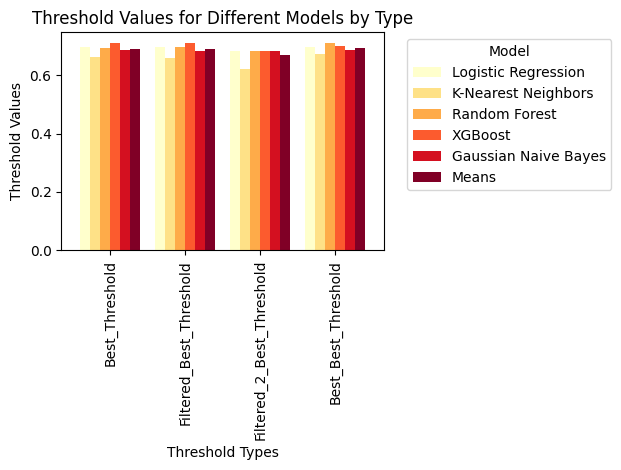

In [ ]:
Balanced_accuracies.set_index('Model', inplace=True)

Balanced_accuracies_transposed = Balanced_accuracies.transpose()

# Plotting using Pandas DataFrame plot function
plt.figure(figsize=(10, 6))
Balanced_accuracies_transposed.plot(kind='bar', width=0.8, colormap = "YlOrRd")
plt.xlabel('Threshold Types')
plt.ylabel('Threshold Values')
plt.title('Threshold Values for Different Models by Type')
plt.xticks(rotation=90)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From this graph, we observe a consistent increase in the mean scores of the models across different scenarios, except when utilizing the filter obtained from the RFE for Logistic Regression—a filter we'll disregard. Ultimately, we determine that the best model involves Random Forest with feature selection and hyperparameter tuning, achieving balanced accuracy slightly surpassed by the voting classifier, though the computational cost associated with it outweighs selecting that model.

### Cost Matrix Cost Comparision

In [ ]:
models = [
    'Logistic Regression',
    'Random Forest',
    'XGBoost',
    'Stacking Classifier',
    'Voting Classifier'

]

values = [
    lr_cost_.mean(), cost_lr_threshold,
    rf_cost_.mean(), cost_rf_threshold,
    cost_xg, cost_xg_threshold,
    cost_stacking, cost_stacking_threshold,
    cost_voting, cost_voting_threshold
]

Cost_Matrix = pd.DataFrame({
    'Model': models,
    'Base_Cost': values[0::2],
    'Threshold_Cost': values[1::2],
})

In [ ]:
Cost_Matrix

,Model,Base_Cost,Threshold_Cost
0,Logistic Regression,8801.0,6051
1,Random Forest,8814.0,5595
2,XGBoost,9129.0,6218
3,Stacking Classifier,8657.0,6673
4,Voting Classifier,8736.0,5844


<Figure size 1000x600 with 0 Axes>

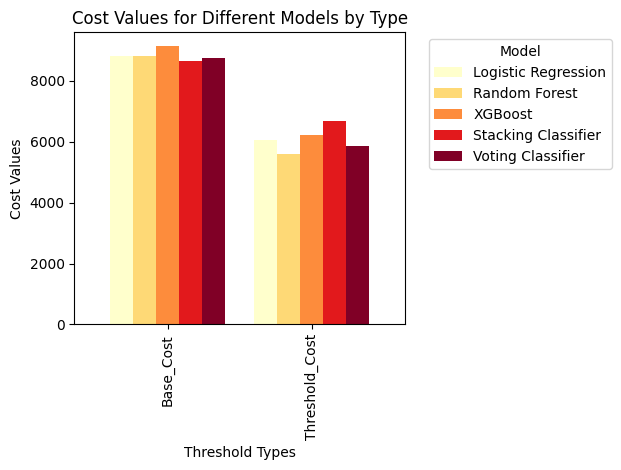

In [ ]:
Cost_Matrix.set_index('Model', inplace=True)

Cost_Matrix_transposed = Cost_Matrix.transpose()

# Plotting using Pandas DataFrame plot function
plt.figure(figsize=(10, 6))
Cost_Matrix_transposed.plot(kind='bar', width=0.8, colormap = "YlOrRd")
plt.xlabel('Threshold Types')
plt.ylabel('Cost Values')
plt.title('Cost Values for Different Models by Type')
plt.xticks(rotation=90)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We note that the Stacking Classifier has the lowest cost with the base threshold. However, after threshold optimization, Random Forest outperforms the others, a significant discovery confirmed through cross-validation. This aligns with our findings from optimizing for balanced accuracy. Therefore, it seems logical in this scenario to solely employ Random Forest with the filtered columns and hyperparameter tuning for predicting defaults next month.

# ChatGPT

Can we do this with their percentage of the dataset?

```python
columns = ['Sex', 'Education', 'Marriage']
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=Credit_Card, x=column)
    plt.title(f"Distribution of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


This was the result

```python
for column in columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=Credit_Card, x=column)
    plt.title(f"Distribution of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Percentage")

    # Calculate percentages and set y-axis ticks as percentages
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_samples) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.2f}%', ha='center')

    plt.xticks(rotation=90)
    plt.show()


Is it possible to group them by columns rather than model?

```python
Balanced_accuracies.set_index('Model', inplace=True)

plt.figure(figsize=(10, 6))
Balanced_accuracies.plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Threshold Values')
plt.title('Threshold Values for Different Models')
plt.xticks(rotation=45)
plt.legend(title='Threshold Type')
plt.tight_layout()
plt.show()


```python

import matplotlib.pyplot as plt

# Your DataFrame definition here

# Transpose the DataFrame to group by columns (threshold types)
Balanced_accuracies_transposed = Balanced_accuracies.transpose()

# Plotting the transposed DataFrame
plt.figure(figsize=(10, 6))
Balanced_accuracies_transposed.plot(kind='bar')
plt.xlabel('Threshold Types')
plt.ylabel('Threshold Values')
plt.title('Threshold Values for Different Models by Type')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()
